# Plots para el 3er entregable

Se necesitan los siguientes gráficos __(36)__:

## Enero 

1. Peaks por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.  (3)
2. Promedios por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar. (3)
3. Stacked bar de los puntos 1 y 2 (peaks y promedios), para destinos de NV Y SA  (6)        
4. Gráfico que incluya minutos/camion, camiones cola, minutos totales, para todos los destinos, parcelados. (1-2)

## Año 2020
1. Peaks por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.
2. Promedios por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.
3. Stacked bar de los puntos 1 y 2 (peaks y promedios), para destinos de NV Y SA
4. Gráfico que incluya minutos/camion, camiones cola, minutos totales, para todos los destinos, parcelados.

__Agregamos la diferencia de tiempo entre los tiempos standard de cola 15 min y los tiempos efectivos__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns
from manager_propio import *

In [2]:
cols = ['Total Time','Datei','Datef','Ti','Tf']

#Cargamos el dataset de actividades
actividad = pd.read_csv('actividad.csv')
actividad = actividad.drop('Unnamed: 0',axis=1)
actividad = actividad.drop(cols,axis=1)
actividad['Start Act'] = pd.to_datetime(actividad['Start Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['End Act'] = pd.to_datetime(actividad['End Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['date start'] = pd.to_datetime(actividad['Start Act']).dt.date
actividad['date end'] = pd.to_datetime(actividad['End Act']).dt.date
actividad['time start'] = pd.to_datetime(actividad['Start Act']).dt.time
actividad['time end'] = pd.to_datetime(actividad['End Act']).dt.time
actividad['Day of year [In]'] = pd.to_datetime(actividad['Start Act']).dt.dayofyear
actividad['Day of year [Out]'] = pd.to_datetime(actividad['End Act']).dt.dayofyear
actividad['time Act'] = ((actividad['End Act']) - pd.to_datetime(actividad['Start Act']))/np.timedelta64(1, 's')

#cargamos el dataset de las colas antiguas
colas_old = pd.read_csv('colas.csv')
colas_old = colas_old.drop('Unnamed: 0',axis=1)
colas_old['Start Cola'] = pd.to_datetime(colas_old['Start Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['End Cola'] = pd.to_datetime(colas_old['End Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['date start'] = pd.to_datetime(colas_old['Start Cola']).dt.date
colas_old['date end'] = pd.to_datetime(colas_old['End Cola']).dt.date
colas_old['time start'] = pd.to_datetime(colas_old['Start Cola']).dt.time
colas_old['time end'] = pd.to_datetime(colas_old['End Cola']).dt.time
colas_old['Day of year [In]'] = pd.to_datetime(colas_old['Start Cola']).dt.dayofyear
colas_old['Day of year [Out]'] = pd.to_datetime(colas_old['End Cola']).dt.dayofyear
colas_old['time cola'] = ((colas_old['End Cola']) - pd.to_datetime(colas_old['Start Cola']))/np.timedelta64(1, 's')

#Cargamos el dataset de las nuevas colas.
colas = pd.read_csv("colas_filtradas_v2.csv")  #ya tiene las horas cambiadas
colas = colas.drop('Unnamed: 0',axis=1)

# Enero
## 1. Peaks por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.
### NPT3

![](./ACT_COLA/Analisis_enero_colas_actividad_peaks_NPT3.png)

### CS-4
![](./ACT_COLA/Analisis_enero_colas_actividad_peaks_CS-4.png)

### NPT4
![](./ACT_COLA/Analisis_enero_colas_actividad_peaks_NPT4.png)

## 2. Promedio por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar. 

In [4]:
#Cargamos los datos para los promedios de Enero
prom_act_enero = analisis_por_dia(actividad,1,31,1,25,None,condicion='end',metric='mean')
prom_cola_end_enero = analisis_por_dia(colas_old,1,31,1,25,None,condicion='end',metric='mean')

### NPT3

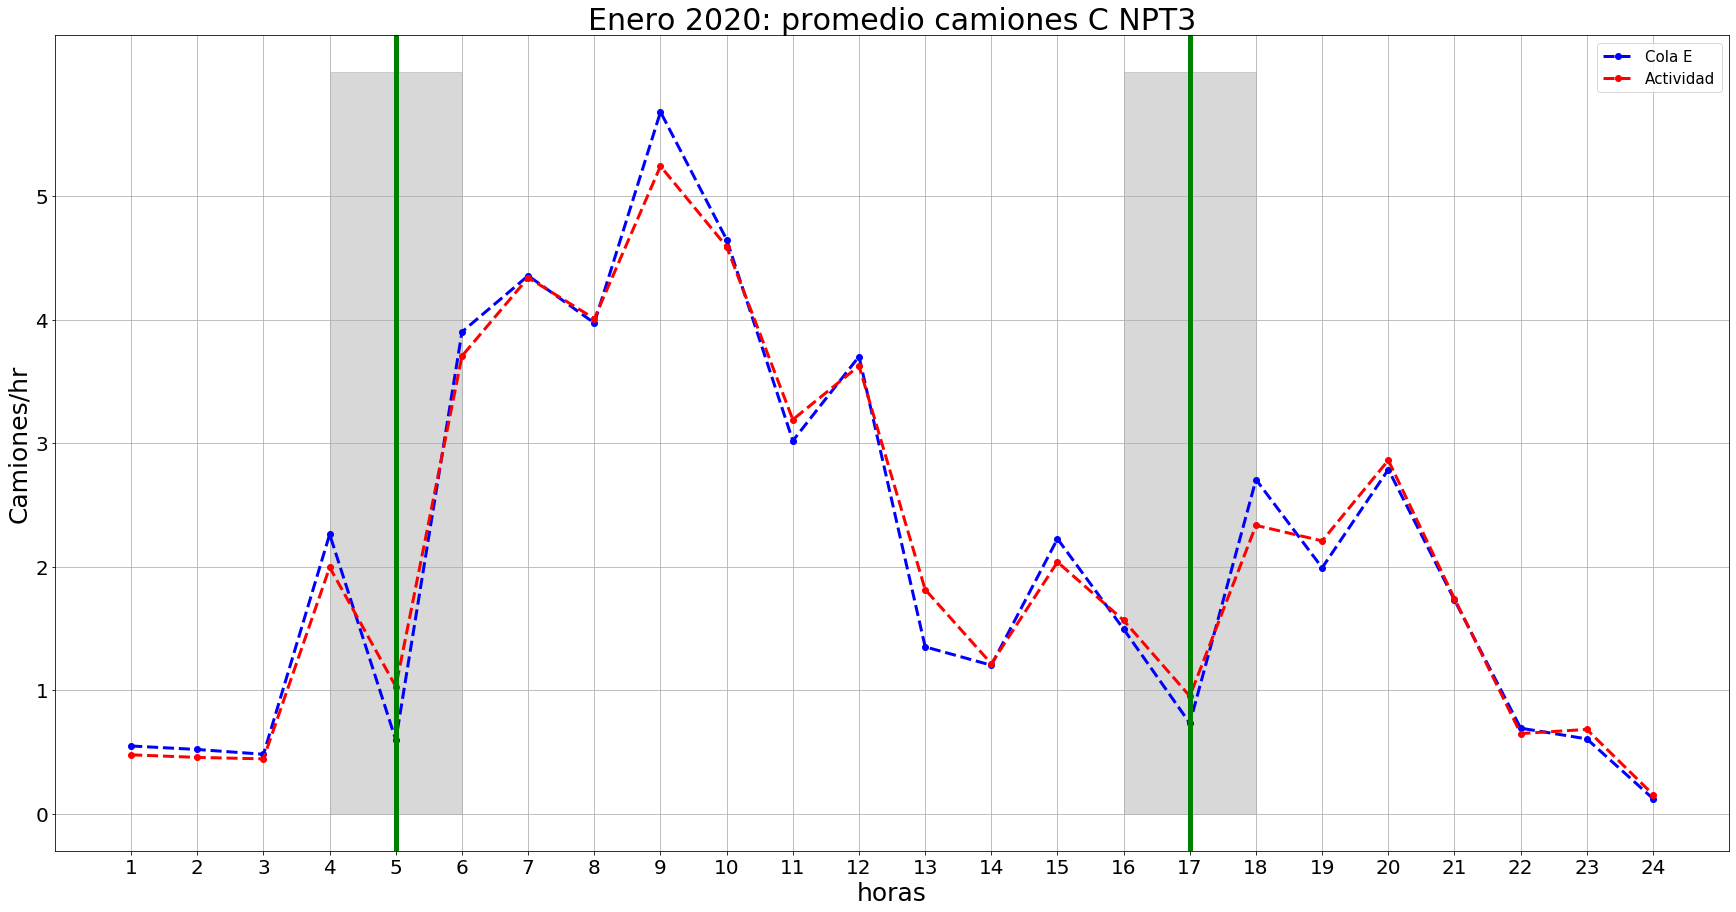

In [5]:
zona = 'C NPT3'
nombre_archivo = "./presentable_3/Analisis_enero_colas_actividad_mean_" + zona + ".png"
titulo = "Enero 2020: promedio camiones " + zona
plot_colas_act(prom_cola_end_enero,prom_act_enero,zone=zona,title=titulo,file=nombre_archivo)

### CS-4

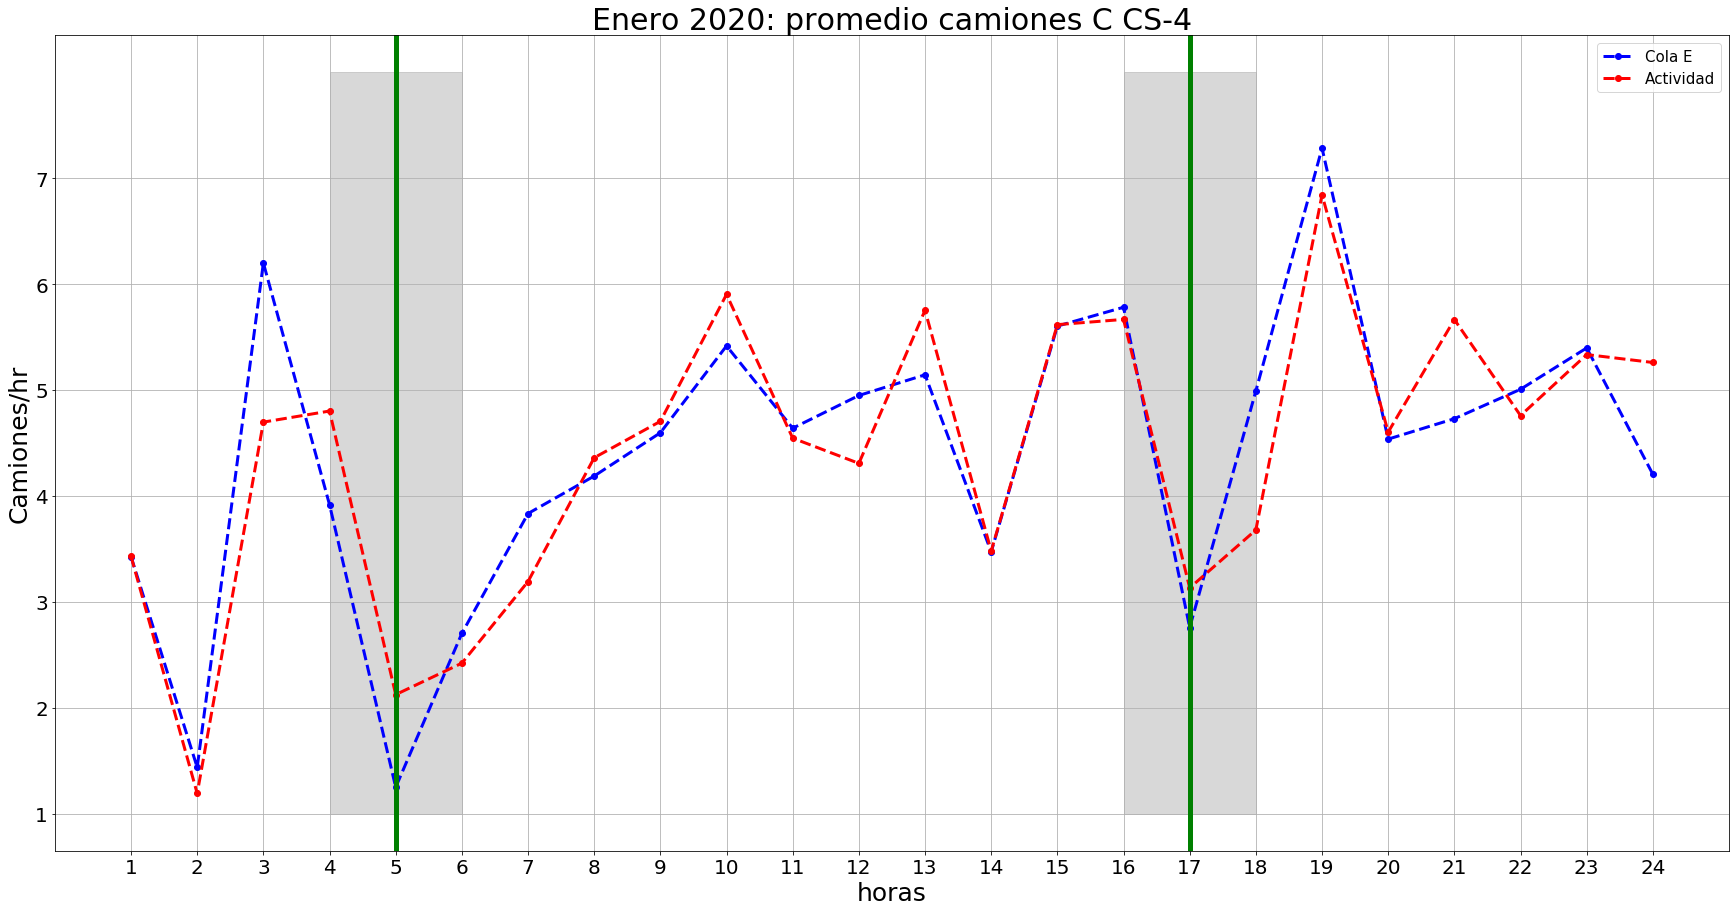

In [6]:
zona = 'C CS-4'
nombre_archivo = "./presentable_3/Analisis_enero_colas_actividad_mean_" + zona + ".png"
titulo = "Enero 2020: promedio camiones " + zona
plot_colas_act(prom_cola_end_enero,prom_act_enero,zone=zona,title=titulo,file=nombre_archivo)

### NPT4

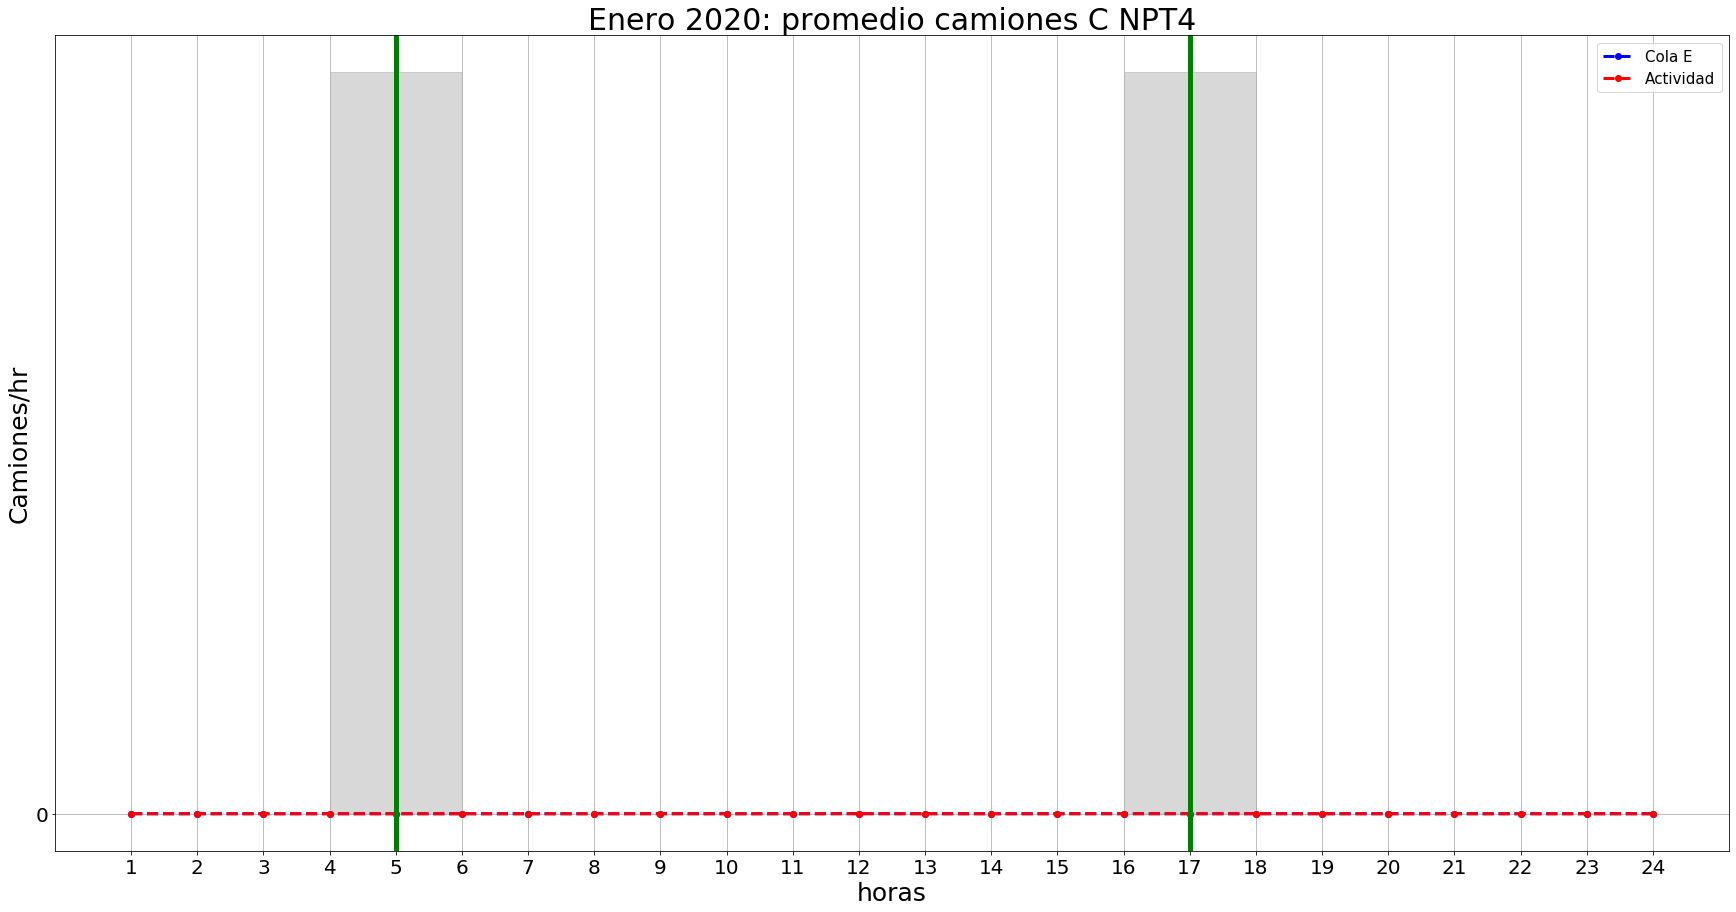

In [7]:
zona = 'C NPT4'
nombre_archivo = "./presentable_3/Analisis_enero_colas_actividad_mean_" + zona + ".png"
titulo = "Enero 2020: promedio camiones " + zona
plot_colas_act(prom_cola_end_enero,prom_act_enero,zone=zona,title=titulo,file=nombre_archivo)

__Los valores que hay para Enero son muy pequeños, menores a 1__

## 3. Stacked bar de los puntos, para destinos de NV Y SA 


In [8]:
#Obtenemos las variables a utilizar
#Utilizaremos todo Enero SA
colas_SA = colas_old[colas_old['Origin']=='Salar de Atacama']
actividad_SA = actividad[actividad['Origin']=='Salar de Atacama']
peaks_cola_enero_SA = analisis_por_dia(colas_SA,1,31,1,25,None,condicion='end',metric='max')
peaks_act_enero_SA = analisis_por_dia(actividad_SA,1,31,1,25,None,condicion='end',metric='max')
prom_cola_enero_SA = analisis_por_dia(colas_SA,1,31,1,25,None,condicion='end',metric='mean')
prom_act_enero_SA = analisis_por_dia(actividad_SA,1,31,1,25,None,condicion='end',metric='mean')
#Utilizaremos todo Enero NV
colas_NV = colas_old[colas_old['Origin']=='Nueva Victoria']
actividad_NV = actividad[actividad['Origin']=='Nueva Victoria']
peaks_cola_enero_NV = analisis_por_dia(colas_NV,1,31,1,25,None,condicion='end',metric='max')
peaks_act_enero_NV = analisis_por_dia(actividad_NV,1,31,1,25,None,condicion='end',metric='max')
prom_cola_enero_NV = analisis_por_dia(colas_NV,1,31,1,25,None,condicion='end',metric='mean')
prom_act_enero_NV = analisis_por_dia(actividad_NV,1,31,1,25,None,condicion='end',metric='mean')

### Peaks

In [9]:
act_peaks_SA_NV = pd.concat([peaks_act_enero_SA,peaks_act_enero_NV],axis=1)
col_peaks_SA_NV = pd.concat([peaks_cola_enero_SA,peaks_cola_enero_NV],axis=1)
sum_actividades = peaks_act_enero_SA+peaks_act_enero_NV

In [10]:
def stacked_grouped_bar_plot(df1,df2,zona,title,file=None,up=22,down=0):
    upper_limit = up
    lower_limit = down
    fig, ax = plt.subplots(figsize=(25,10))
    #df1[zona].plot.bar(stacked=True, width=0.4, position=1.0,colormap="cool", ax=ax, alpha=1.0)
    plt.plot(np.arange(0,24,1),df1[zona],c='green',lw='3')
    df2[zona].plot.bar(stacked=True, width=0.3,align='center', colormap='coolwarm', ax=ax, alpha=1.)
    ax.legend(["Actividad","SA Cola", "NV Cola"],fontsize=15);
    plt.xticks(np.arange(0,25,1),fontsize=15)
    plt.xlim([-1,24])
    plt.yticks(np.arange(lower_limit,upper_limit,1),fontsize=15)
    plt.grid(True,alpha=0.4)
    plt.title(title,fontsize=30)
    if file!=None:
        plt.savefig(file)
    plt.show()

### NPT3

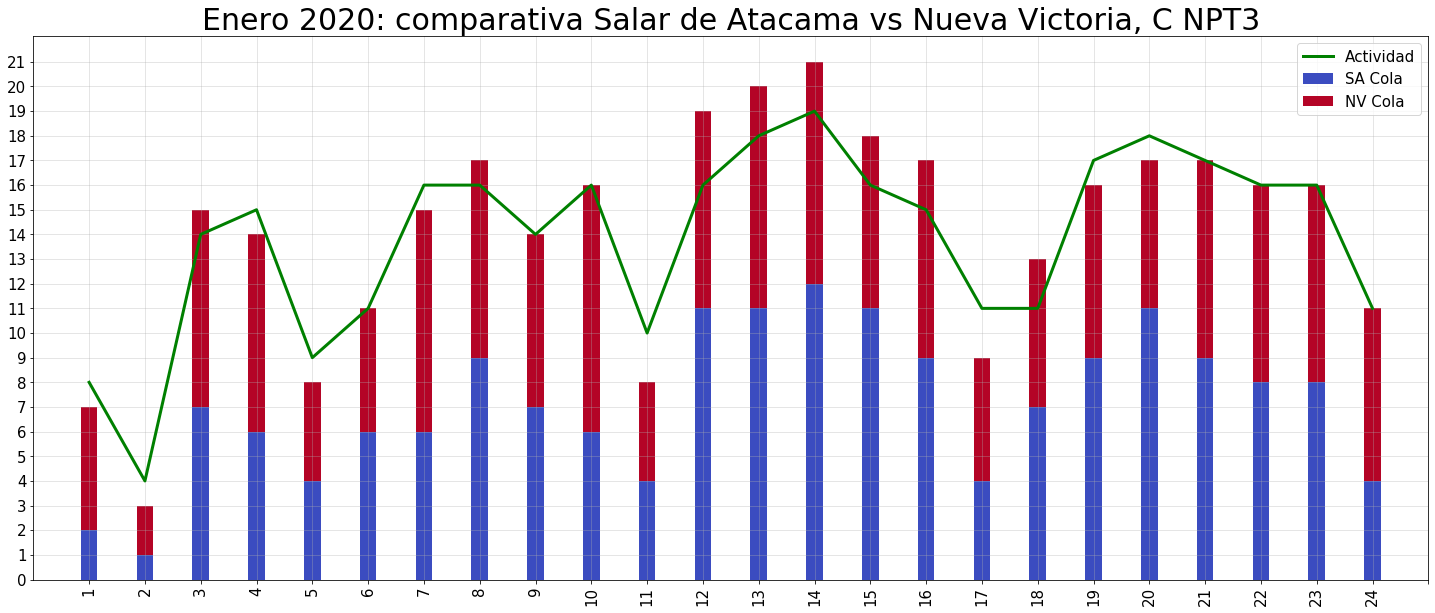

In [11]:
zona = 'C NPT3'
titulo = "Enero 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_peaks_SA_NV_'+zona+'.png'

stacked_grouped_bar_plot(sum_actividades,col_peaks_SA_NV,zona,titulo,file)

### CS-4

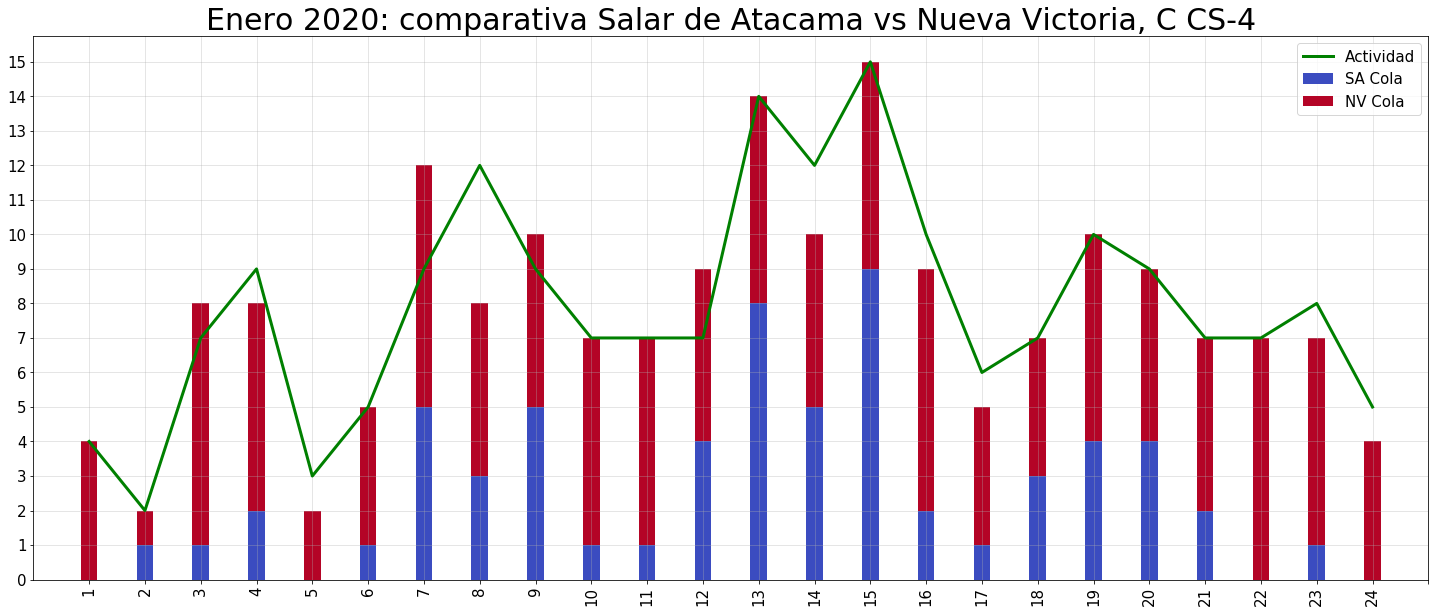

In [12]:
zona = 'C CS-4'
titulo = "Enero 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_peaks_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_actividades,col_peaks_SA_NV,zona,titulo,file,16)

### NPT4

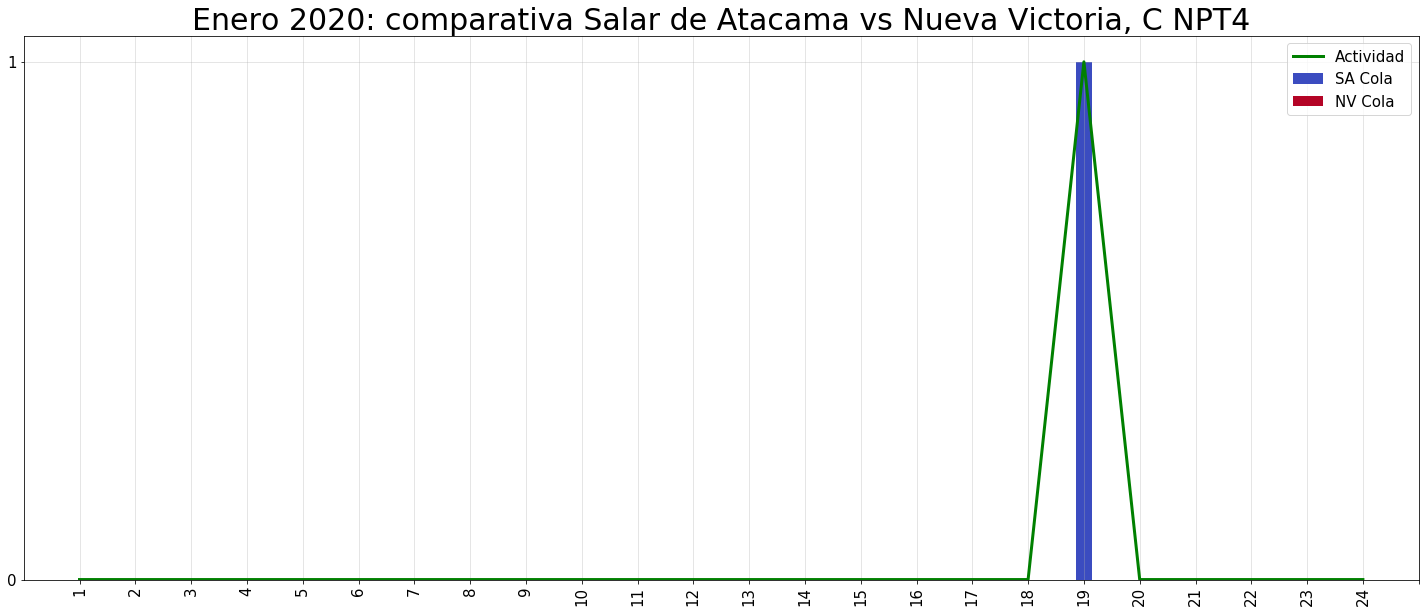

In [13]:
zona = 'C NPT4'
titulo = "Enero 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_peaks_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_actividades,col_peaks_SA_NV,zona,titulo,file,2)

__como vemos no hay mucha actividada__

## Promedios

In [14]:
act_prom_SA_NV = pd.concat([prom_act_enero_SA,prom_act_enero_NV],axis=1)
col_prom_SA_NV = pd.concat([prom_cola_enero_SA,prom_cola_enero_NV],axis=1)
sum_act_prom = prom_act_enero_SA + prom_act_enero_NV

### NPT3

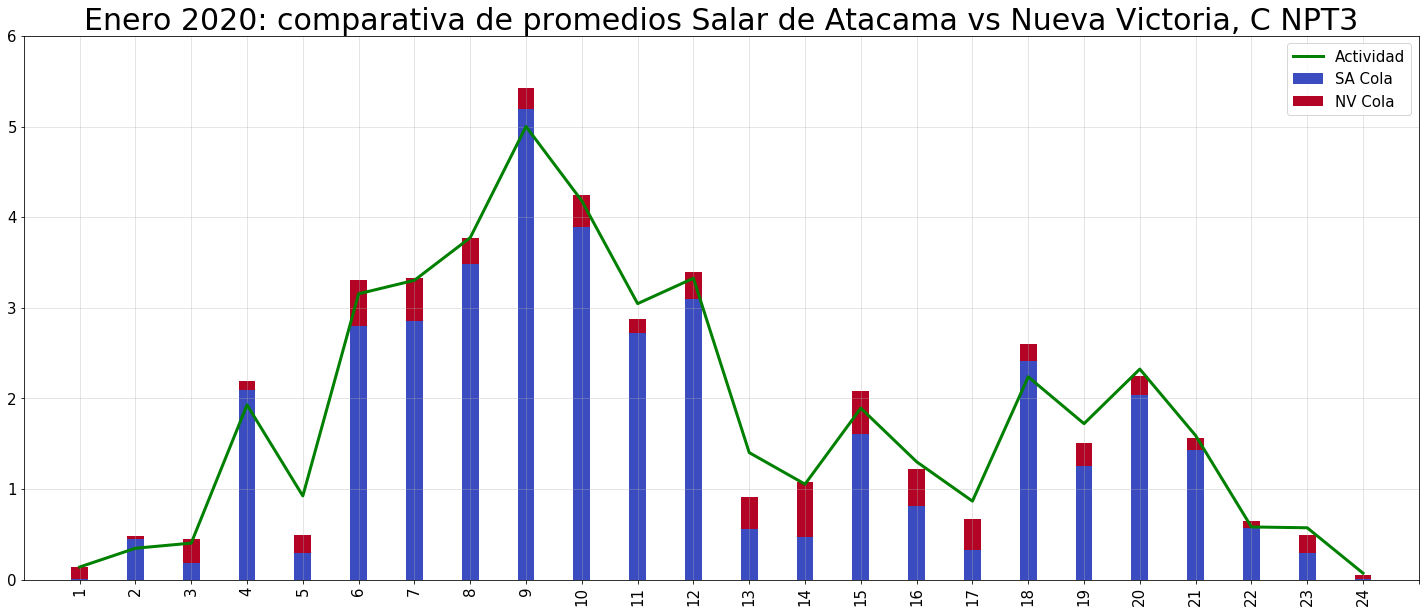

In [15]:
zona = 'C NPT3'
titulo = "Enero 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_mean_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

### CS-4

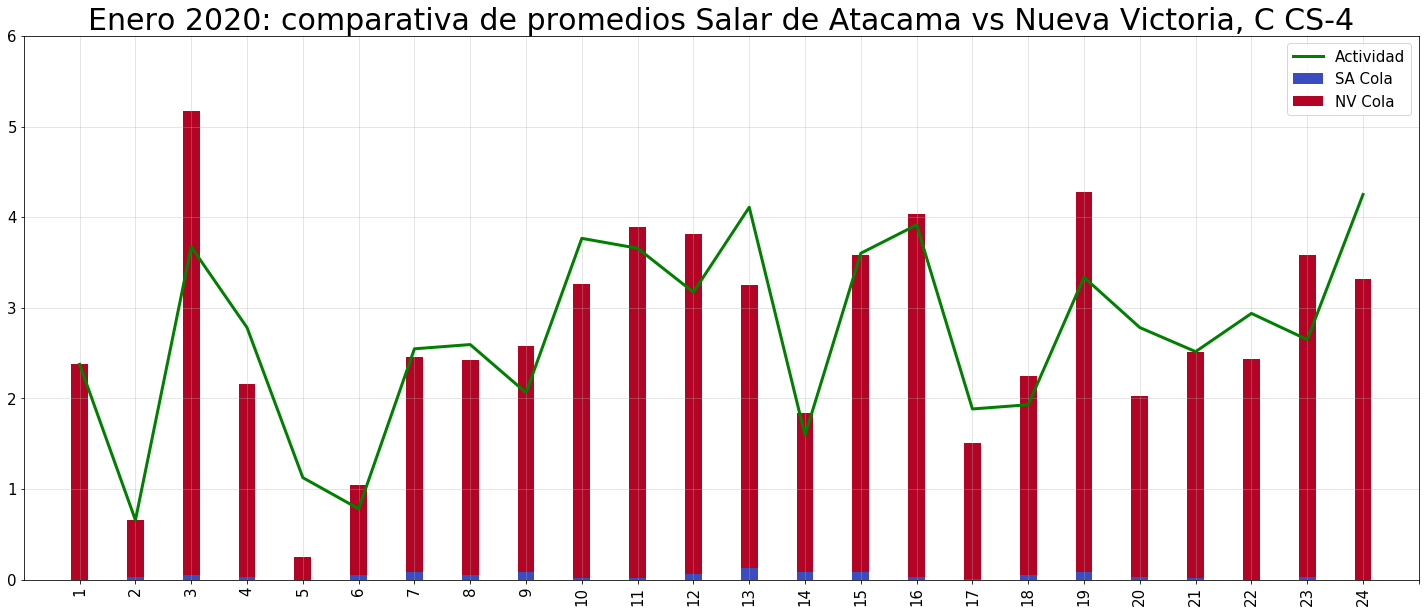

In [16]:
zona = 'C CS-4'
titulo = "Enero 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_mean_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

### NPT4

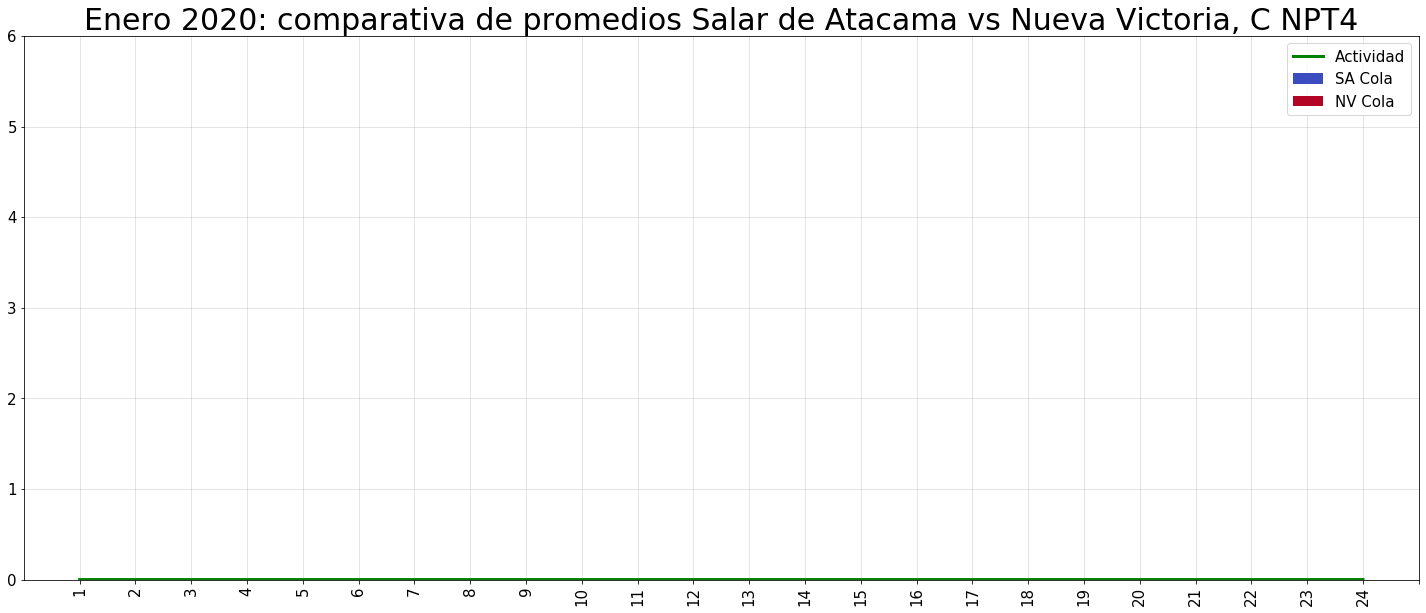

In [17]:
zona = 'C NPT4'
titulo = "Enero 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/enero_mean_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

__Para el mes de Enero no tiene sentido hablar de la NPT4, pues no estuvo en actividad__

# 4. Gráfico minutos/camion, camiones cola, minutos totales,parcelados.

In [18]:
def plot_minutos_totales(df,title,file,gap=10,gap_2=1):    
    min1 = int(df['minutos/camion'].min())
    min2 = int(df['minutos'].min())
    max1 = int(df['minutos/camion'].max()+5)
    max2 = int(df['minutos'].max()+5)

    fig, ax = plt.subplots(figsize=(20,10))
    plt.title(title,fontsize=25)
    plt.grid(True,alpha=0.4)

    ax.set_xlabel('Horas',fontsize=20)
    ax.set_ylabel('Min/camion',fontsize=20, color='black')
    line1 = ax.plot(df['block'], df['minutos/camion'],marker='o',linestyle='-',lw=3, color='red',label='min/truck')
    line3 = ax.bar(df['block'],df['camiones'],width=0.5, color='blue',align='center')
    ax.legend(["trucks"],loc='upper left')
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_xticks(np.arange(1,25,1))
    ax.set_xticklabels(np.arange(1,25,1),fontsize=15)
    ax.set_yticks(np.arange(0,max1,gap_2))
    ax.set_yticklabels(np.arange(0,max1,gap_2),fontsize=15)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('Minutos', fontsize=20, color='black')  # we already handled the x-label with ax1
    line2 = ax2.plot(df['block'],df['minutos'],marker='o',linestyle='--',lw=3,color='green',label='Minutos totales')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_yticks(np.arange(0,max2,gap))
    ax2.set_yticklabels(np.arange(0,max2,gap),fontsize=15)
    ax2.fill_between(df['block'],df['minutos'],alpha=0.3)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    # added these two lines
    lns = line1+line2
    labs = [l.get_label() for l in lns]
    #print(lns)
    ax.legend(lns, labs, loc=0,fontsize=20)
    if file != None: 
        plt.savefig(file)
    plt.show()

def stack_by_day_2(df,zone,dia_inicial,dia_final,metric='max',name=None,origen=None):
    "Nos entrega el análisis por una cantidad X de dias, toma los días del año"
    count = 0
    df_final = None
    if (origen != None):
        df = df[df['Origin'] == origen]
    for i in range(dia_inicial,dia_final+1):
        #print(i)
        aux,_ = convert_df_to_df(df,zone,i)
        if count == 0:
            df_final = aux
            count += 1
        else:
            if (metric == 'max'):
                df_final = pd.concat([df_final, aux]).max(level=0)   #Aquí indico que necesito los peaks
            elif (metric == 'mean'):
                df_final = pd.concat([df_final,aux]).mean(level=0)
    if name != None:
        df_final.sort_index(axis=0).to_csv(name,index=False)
    return df_final.sort_index(axis=0)

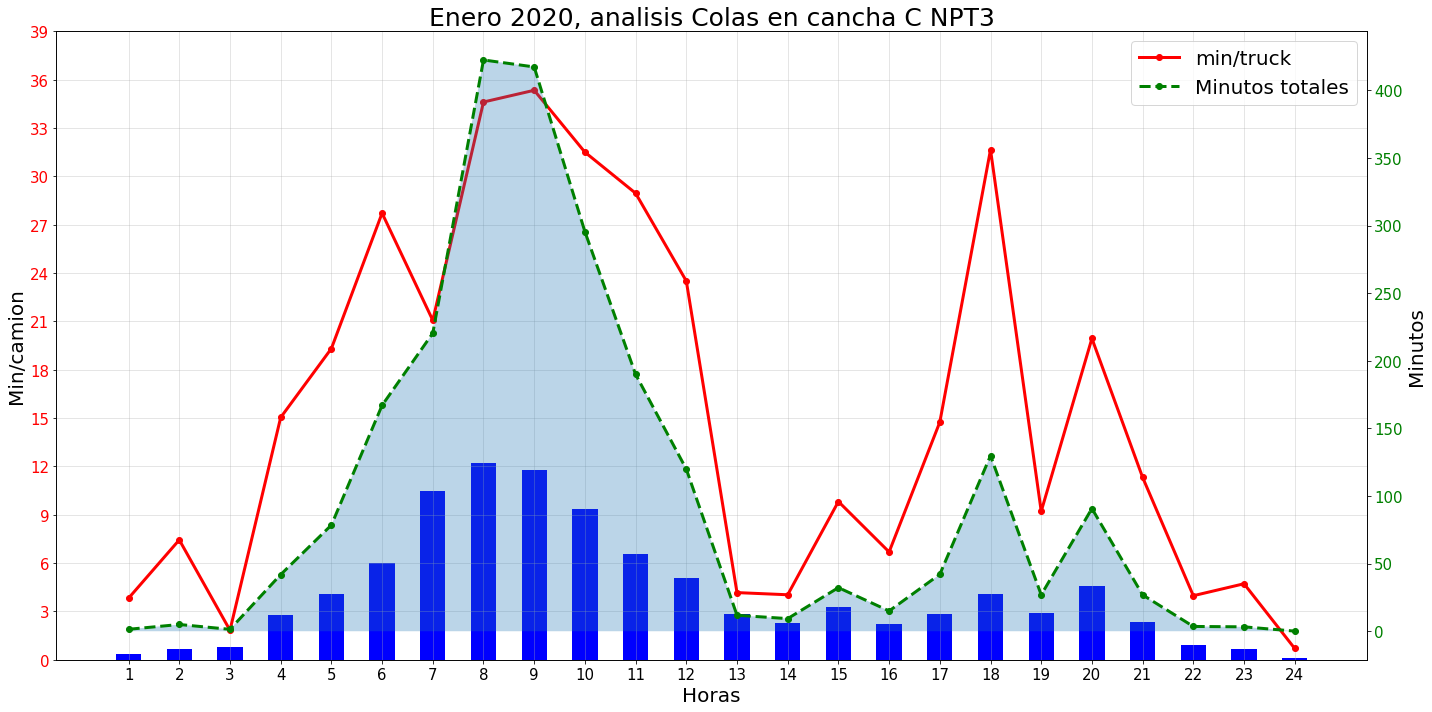

In [19]:
zona = 'C NPT3'
mes_2020 = stack_by_day(colas,zona,1,31,metric='mean')
a_1 = mes_2020
a_1['minutos'] = a_1['minutos/camion']*a_1['camiones']
title = "Enero 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_enero_"+zona+".png"
plot_minutos_totales(a_1,title,file,50,3)

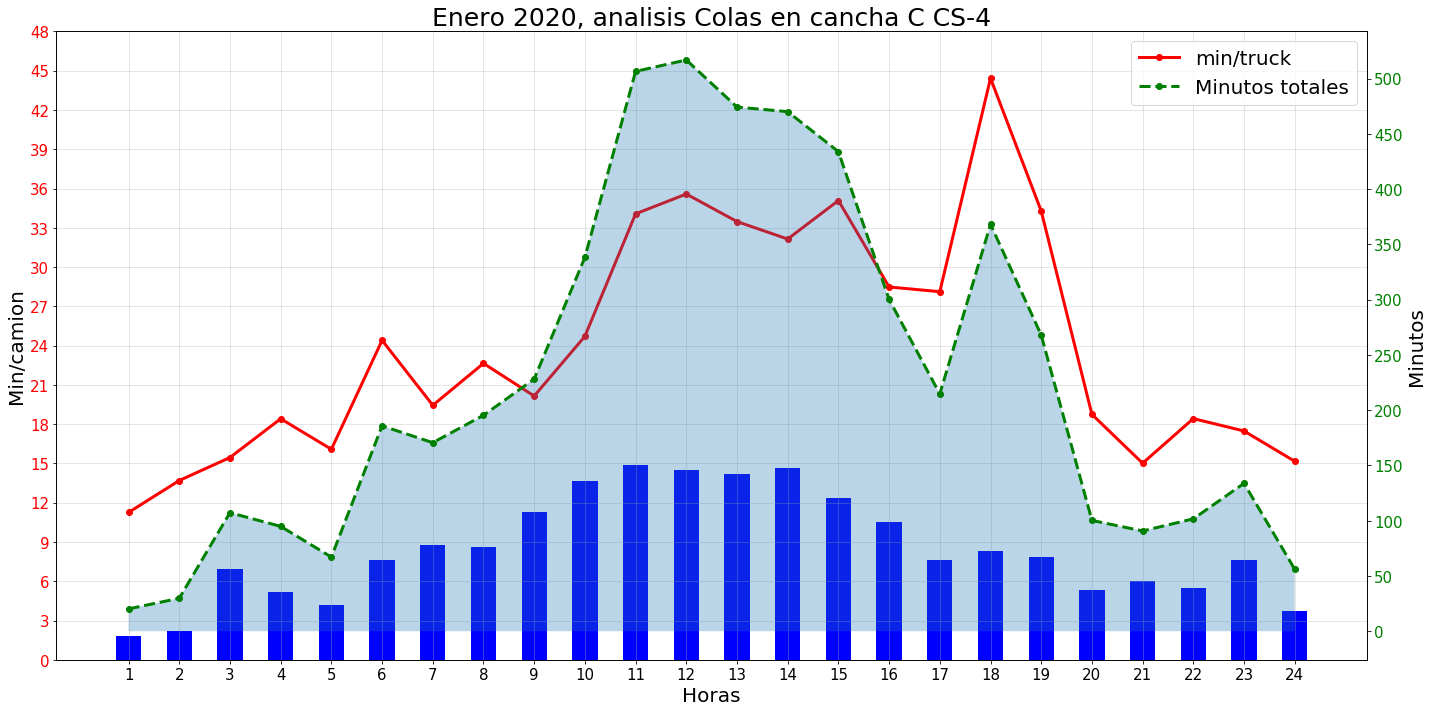

In [20]:
zona = 'C CS-4'
mes_2020 = stack_by_day_2(colas,zona,1,31,metric='mean')
a_2 = mes_2020
a_2['minutos'] = a_2['minutos/camion']*a_2['camiones']
title = "Enero 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_enero_"+zona+".png"
plot_minutos_totales(a_2,title,file,50,3)

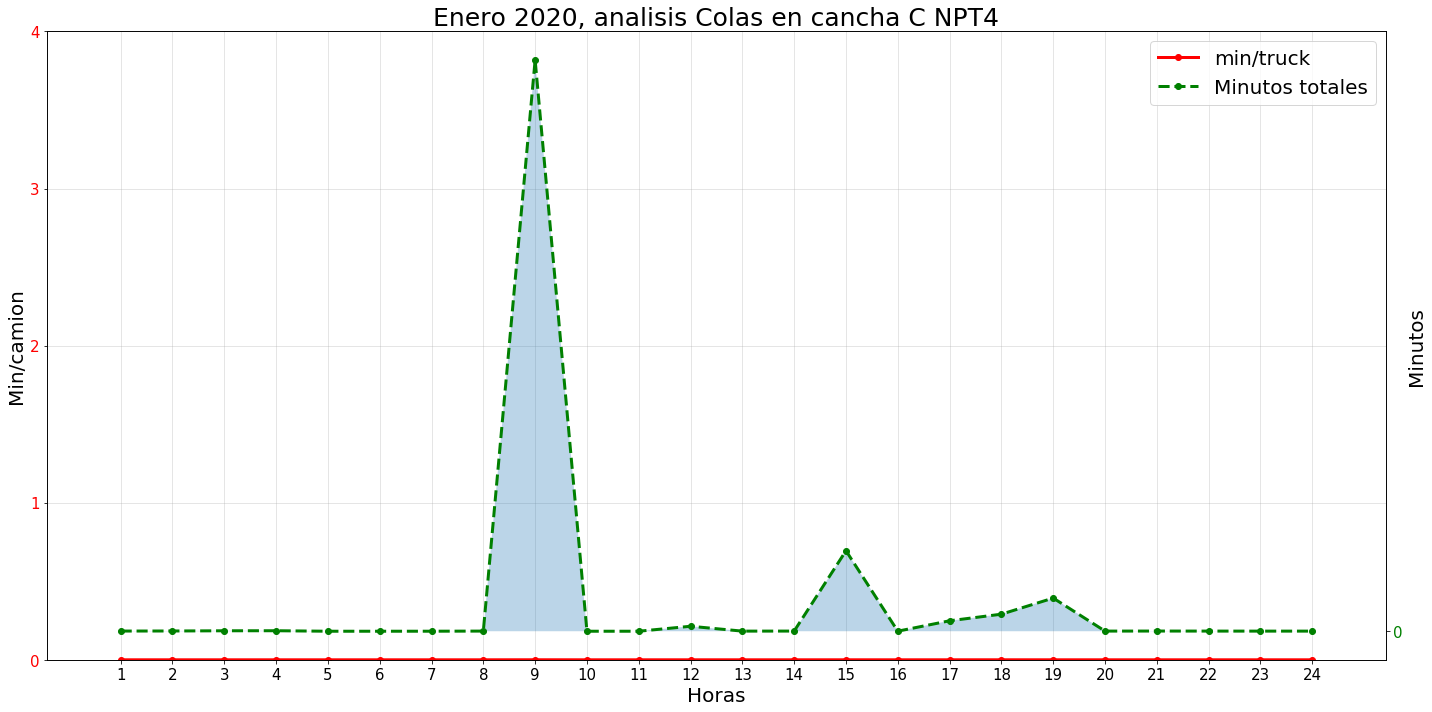

In [21]:
zona = 'C NPT4'
mes_2020 = stack_by_day_2(colas,zona,1,31,metric='mean')
a_3 = mes_2020
a_3['minutos'] = a_3['minutos/camion']*a_3['camiones']
title = "Enero 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_enero_"+zona+".png"
plot_minutos_totales(a_3,title,file)

# Año 2020
##  1. Peaks por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.
Por hacer...
2. Promedios por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar.
3. Stacked bar de los puntos 1 y 2 (peaks y promedios), para destinos de NV Y SA
4. Gráfico que incluya minutos/camion, camiones cola, minutos totales, para todos los destinos, parcelados.

### NPT3

![](./ACT_COLA/Analisis_2020_colas_actividad_peaks_NPT3.png)


### CS-4

![](./ACT_COLA/Analisis_2020_colas_actividad_peaks_CS-4.png)

### NPT4

![](./ACT_COLA/Analisis_2020_colas_actividad_peaks_NPT4.png)

## 2. Promedios por cancha (NPT3,CS-4,NPT4) de todos los destinos act/cola, por bloque, es decir sin parcelar. 

In [22]:
prom_cola_2020 = analisis_por_dia(colas_old,1,160,1,25,None,condicion='end',metric='mean')
prom_act_2020 = analisis_por_dia(actividad,1,160,1,25,None,condicion='end',metric='mean')

### NPT3

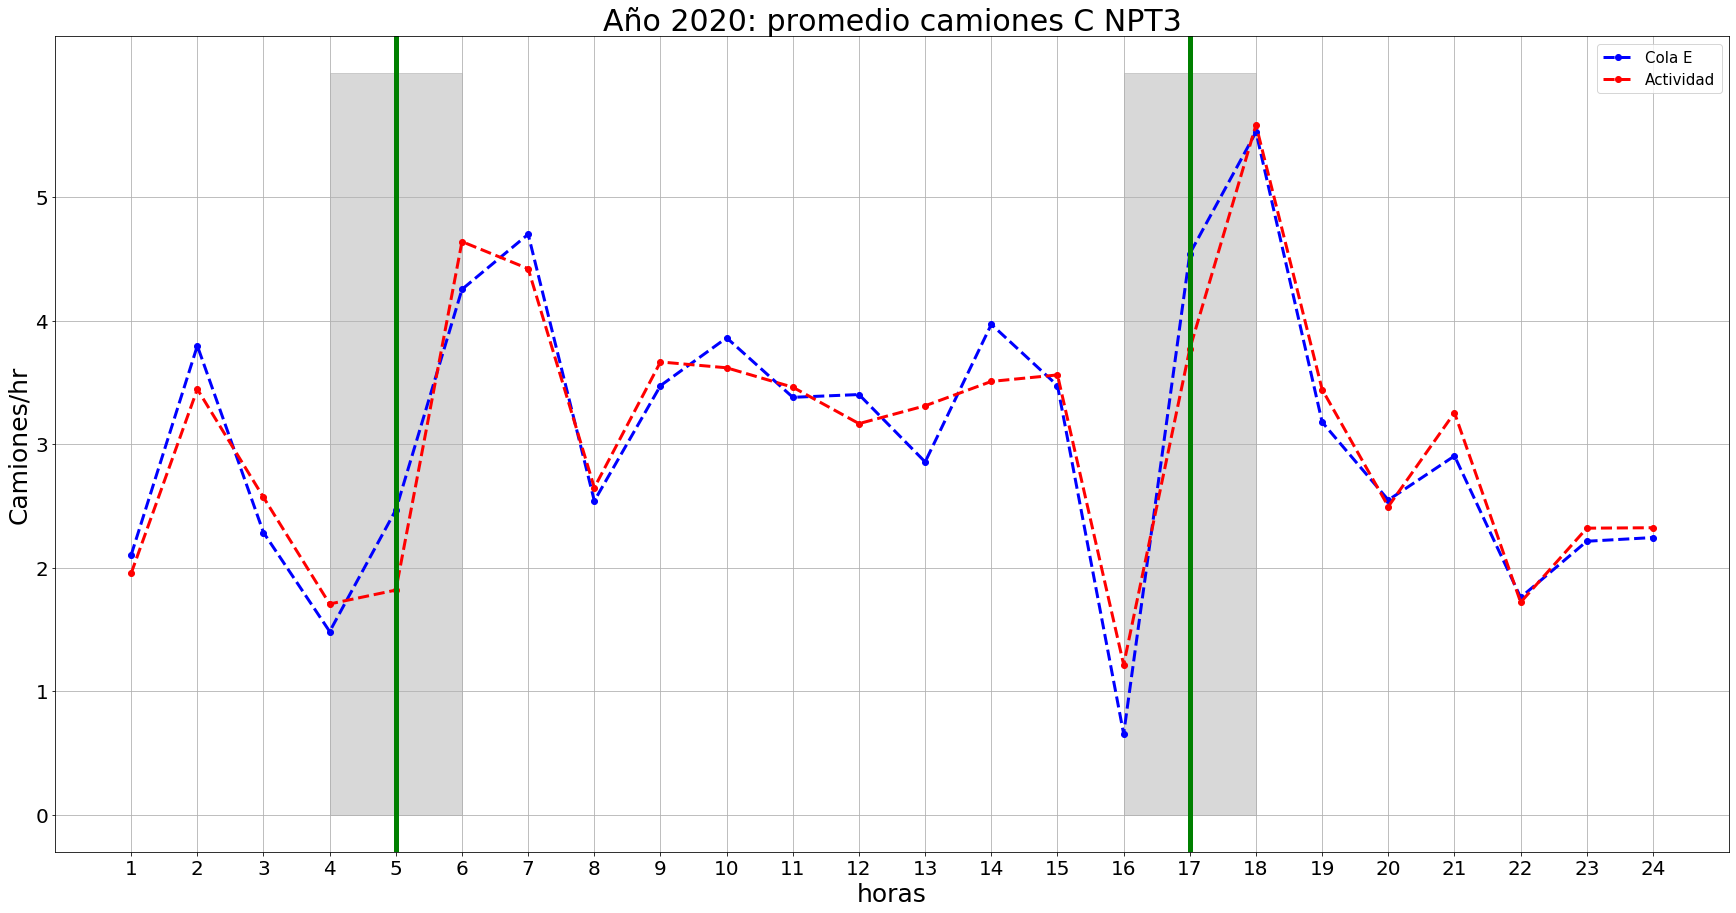

In [23]:
zona = 'C NPT3'
nombre_archivo = "./presentable_3/Analisis_2020_colas_actividad_mean_" + zona + ".png"
titulo = "Año 2020: promedio camiones " + zona
plot_colas_act(prom_cola_2020,prom_act_2020,zone=zona,title=titulo,file=nombre_archivo)

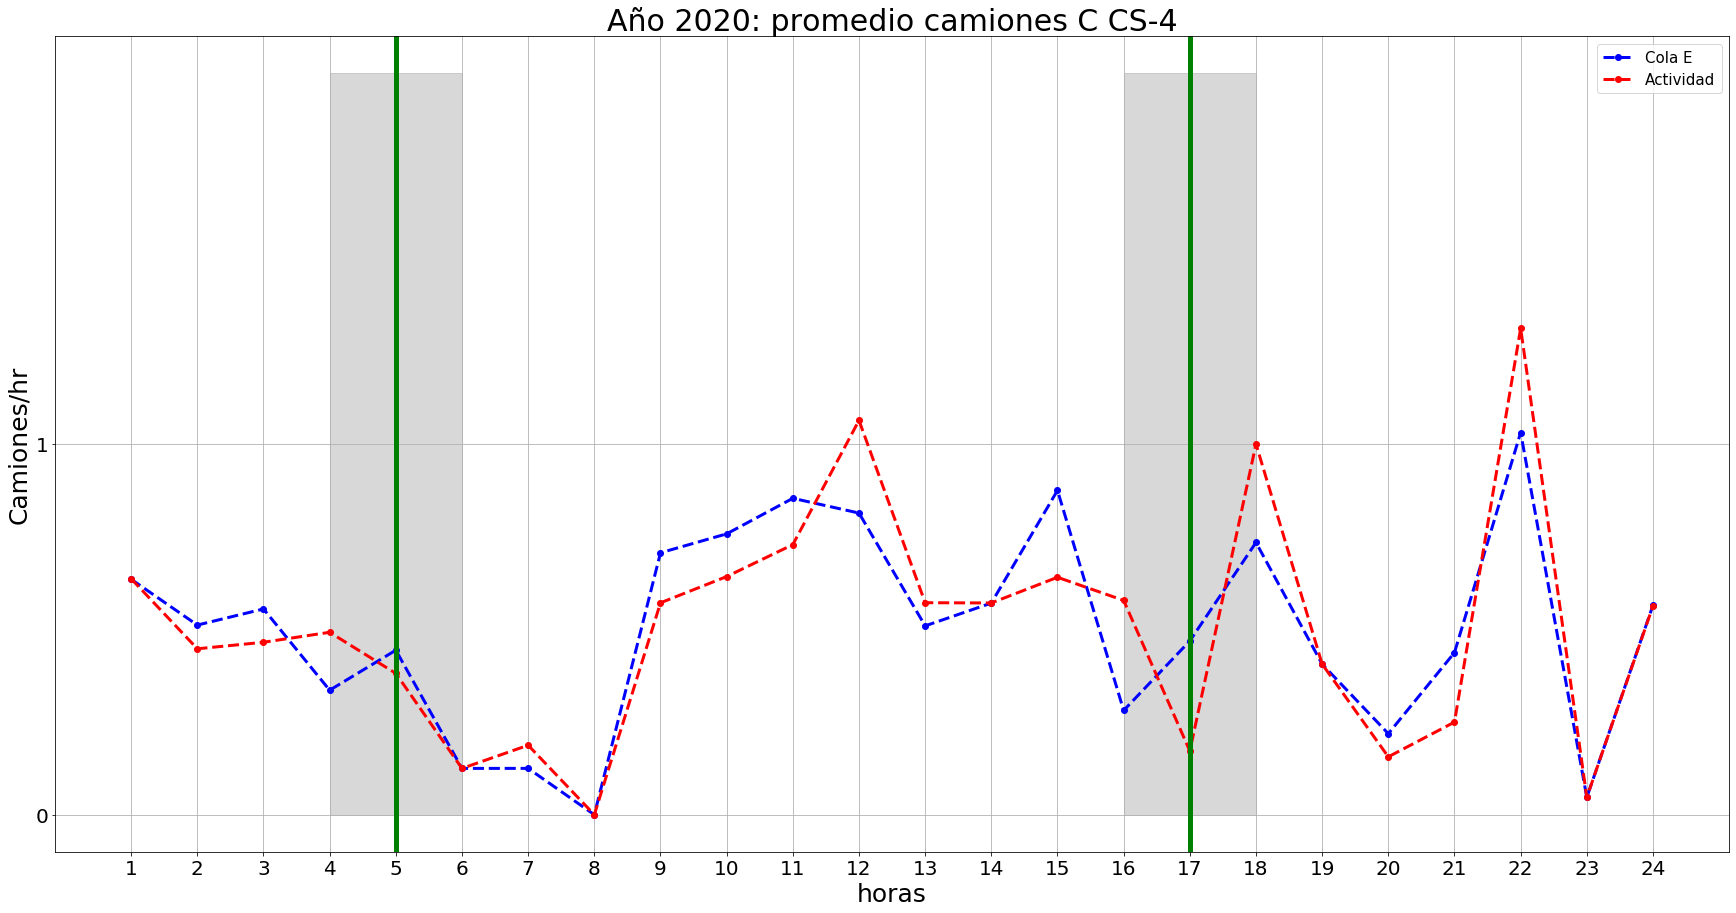

In [24]:
zona = 'C CS-4'
nombre_archivo = "./presentable_3/Analisis_2020_colas_actividad_mean_" + zona + ".png"
titulo = "Año 2020: promedio camiones " + zona
plot_colas_act(prom_cola_2020,prom_act_2020,zone=zona,title=titulo,file=nombre_archivo)

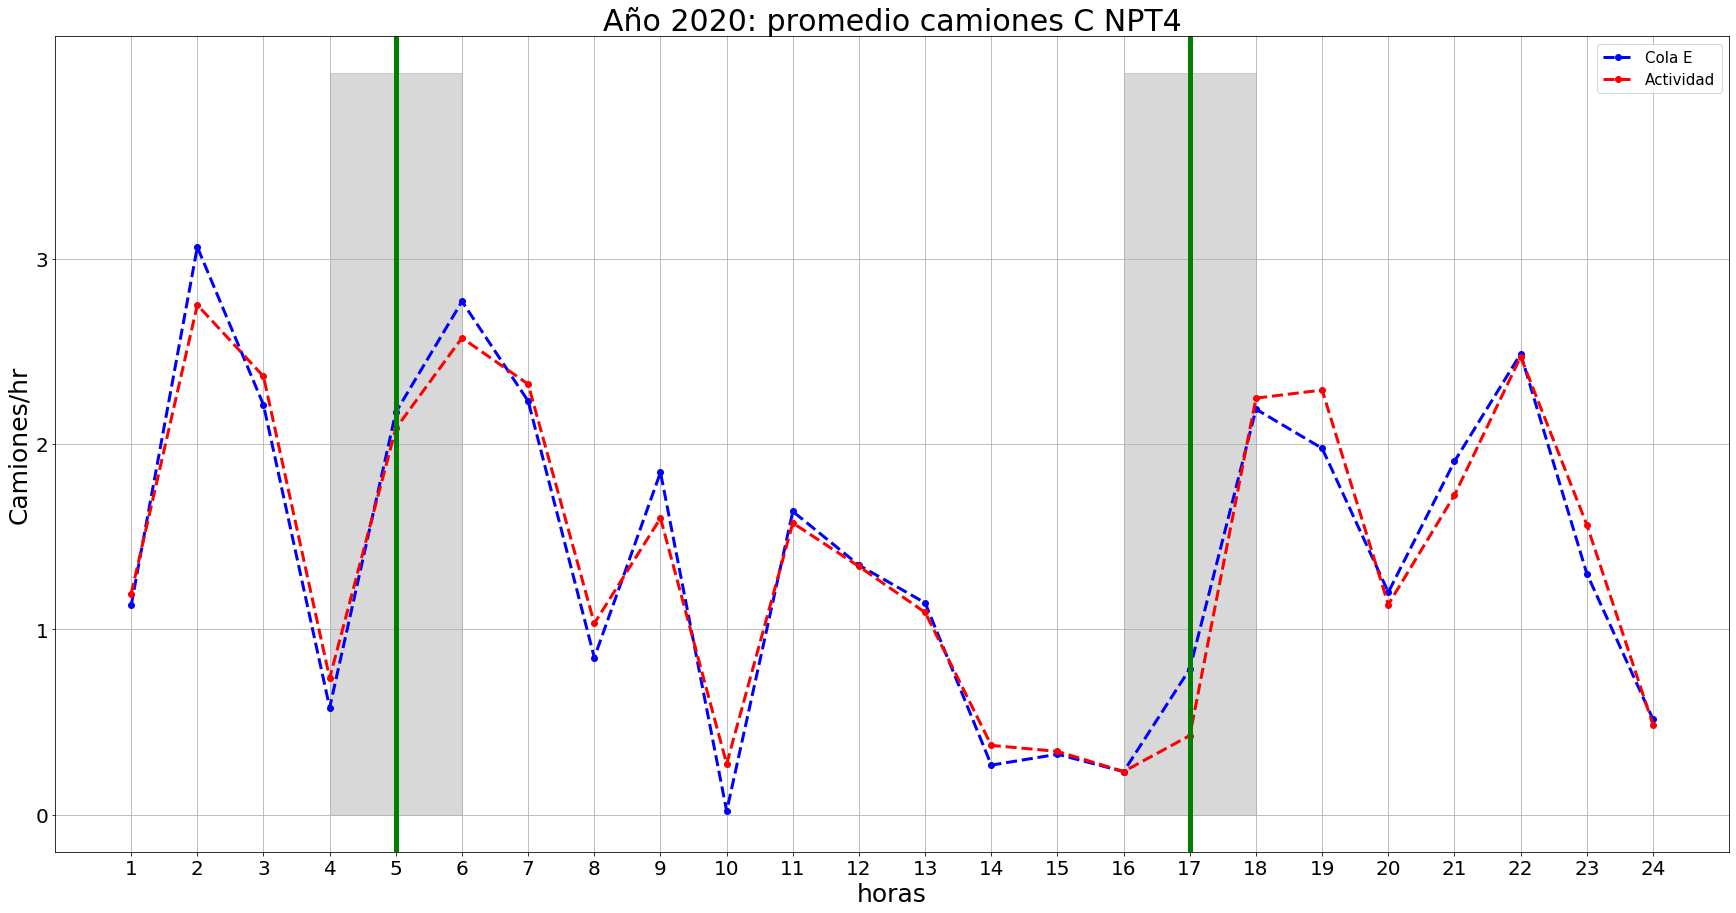

In [25]:
zona = 'C NPT4'
nombre_archivo = "./presentable_3/Analisis_2020_colas_actividad_mean_" + zona + ".png"
titulo = "Año 2020: promedio camiones " + zona
plot_colas_act(prom_cola_2020,prom_act_2020,zone=zona,title=titulo,file=nombre_archivo)

# 3. Stacked bar para destinos de NV Y SA


In [26]:
#Obtenemos las variables a utilizar
#Utilizaremos todo 2020 SA
colas_SA = colas_old[colas_old['Origin']=='Salar de Atacama']
actividad_SA = actividad[actividad['Origin']=='Salar de Atacama']

peaks_cola_2020_SA = analisis_por_dia(colas_SA,1,160,1,25,None,condicion='end',metric='max')
peaks_act_2020_SA = analisis_por_dia(actividad_SA,1,160,1,25,None,condicion='end',metric='max')
prom_cola_2020_SA = analisis_por_dia(colas_SA,1,160,1,25,None,condicion='end',metric='mean')
prom_act_e2020_SA = analisis_por_dia(actividad_SA,1,160,1,25,None,condicion='end',metric='mean')

#Utilizaremos todo 2020 NV
colas_NV = colas_old[colas_old['Origin']=='Nueva Victoria']
actividad_NV = actividad[actividad['Origin']=='Nueva Victoria']

peaks_cola_2020_NV = analisis_por_dia(colas_NV,1,160,1,25,None,condicion='end',metric='max')
peaks_act_2020_NV = analisis_por_dia(actividad_NV,1,160,1,25,None,condicion='end',metric='max')
prom_cola_2020_NV = analisis_por_dia(colas_NV,1,160,1,25,None,condicion='end',metric='mean')
prom_act_2020_NV = analisis_por_dia(actividad_NV,1,160,1,25,None,condicion='end',metric='mean')

## Peaks

In [27]:
eneroact_peaks_2020_SA_NV = pd.concat([peaks_act_2020_SA,peaks_act_2020_NV],axis=1)
col_peaks_2020_SA_NV = pd.concat([peaks_cola_2020_SA,peaks_cola_2020_NV],axis=1)
sum_actividades_2020 = peaks_act_2020_SA+peaks_act_2020_NV

### NPT3

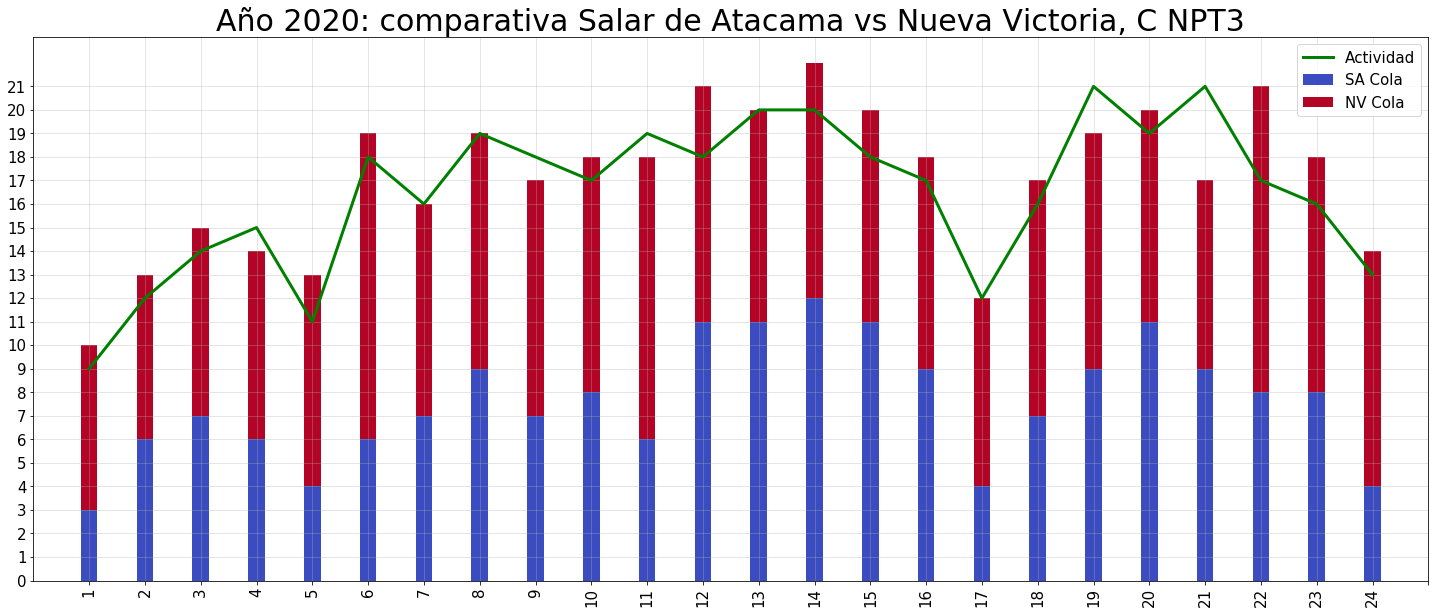

In [28]:
zona = 'C NPT3'
titulo = "Año 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/peaks_2020_SA_NV_'+zona+'.png'

stacked_grouped_bar_plot(sum_actividades_2020,col_peaks_2020_SA_NV,zona,titulo,file)

### CS-4

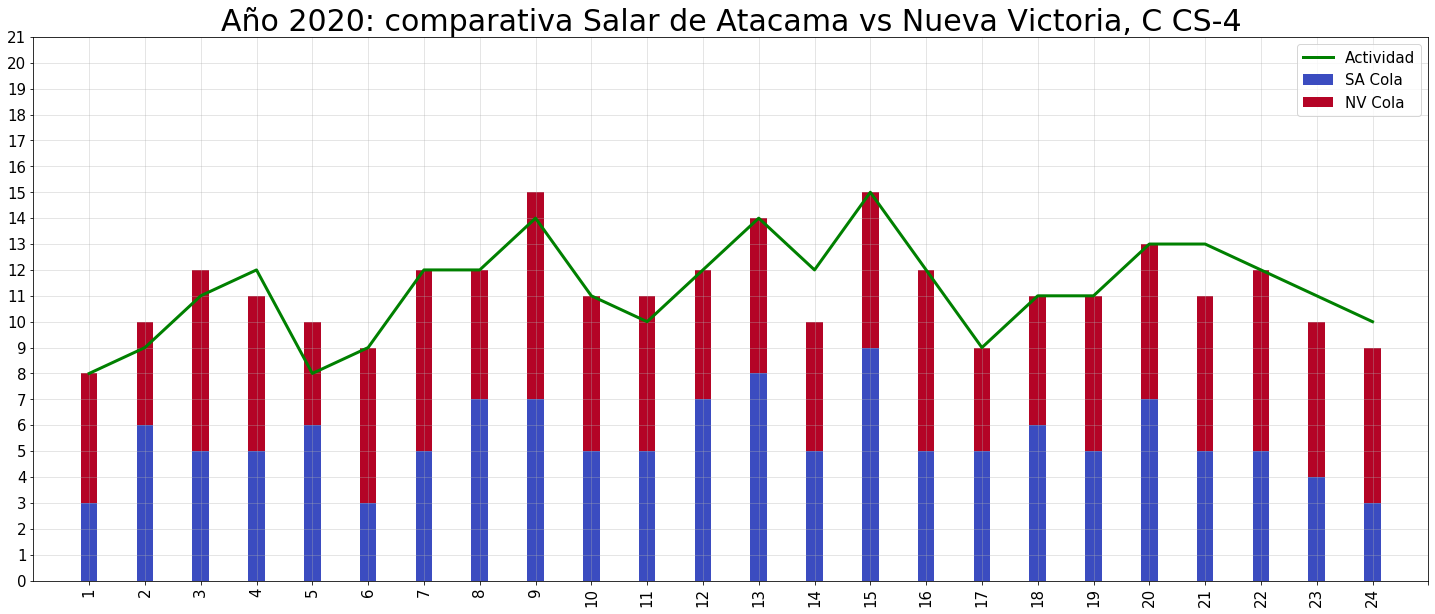

In [29]:
zona = 'C CS-4'
titulo = "Año 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/peaks_2020_SA_NV_'+zona+'.png'

stacked_grouped_bar_plot(sum_actividades_2020,col_peaks_2020_SA_NV,zona,titulo,file)

### NPT4

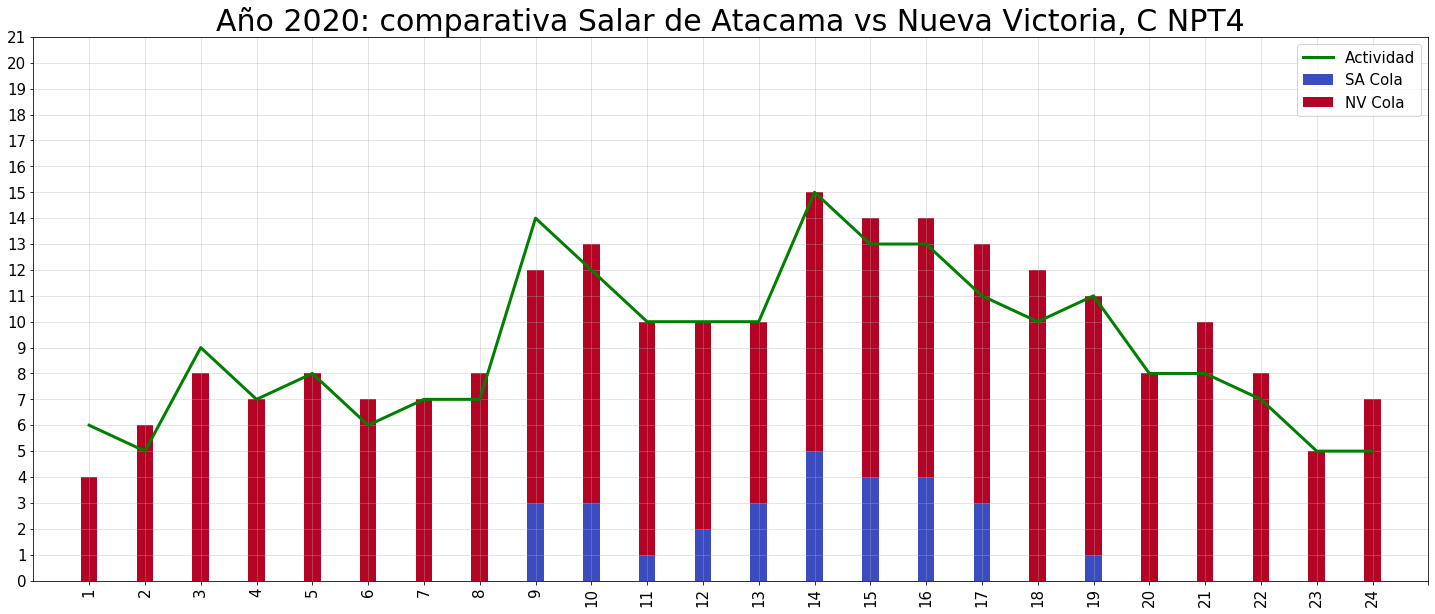

In [30]:
zona = 'C NPT4'
titulo = "Año 2020: comparativa Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/peaks_2020_SA_NV_'+zona+'.png'

stacked_grouped_bar_plot(sum_actividades_2020,col_peaks_2020_SA_NV,zona,titulo,file)

## Promedios

In [31]:
act_prom_2020_SA_NV = pd.concat([prom_act_e2020_SA,prom_act_2020_NV],axis=1)
col_prom_2020_SA_NV = pd.concat([prom_cola_2020_SA,prom_cola_2020_NV],axis=1)
sum_act_prom_2020 = prom_act_e2020_SA + prom_act_2020_NV

### NPT3

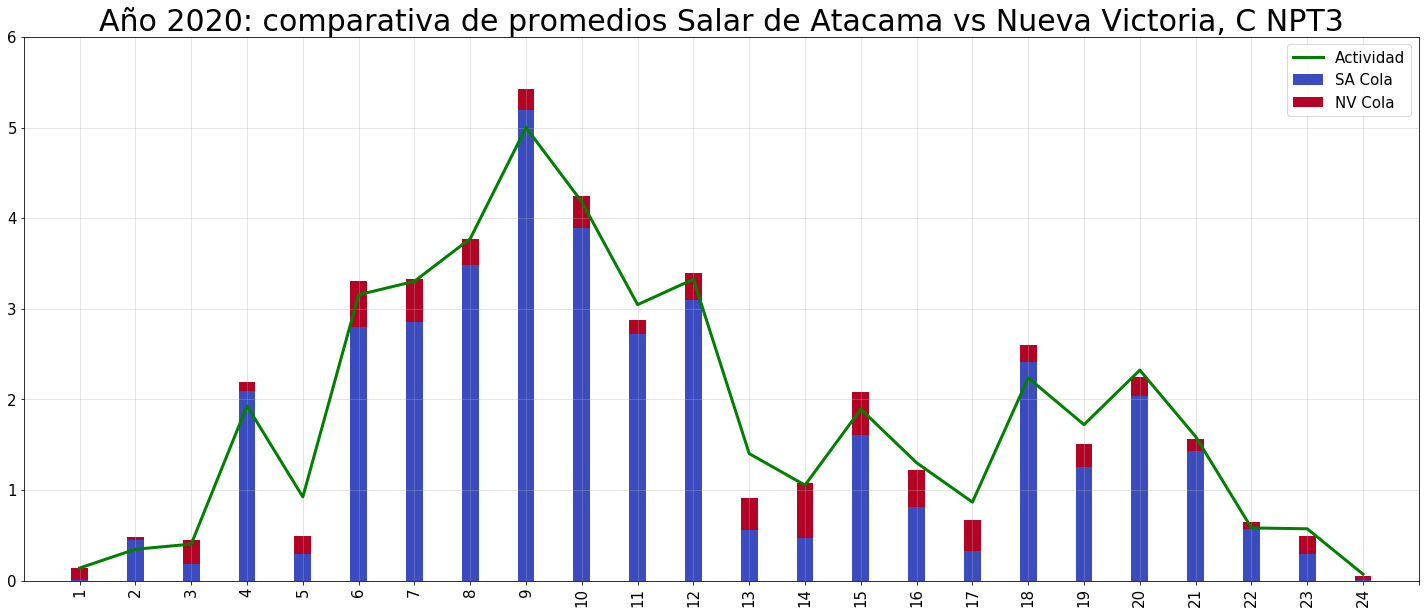

In [32]:
zona = 'C NPT3'
titulo = "Año 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/mean_2020_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

### CS-4

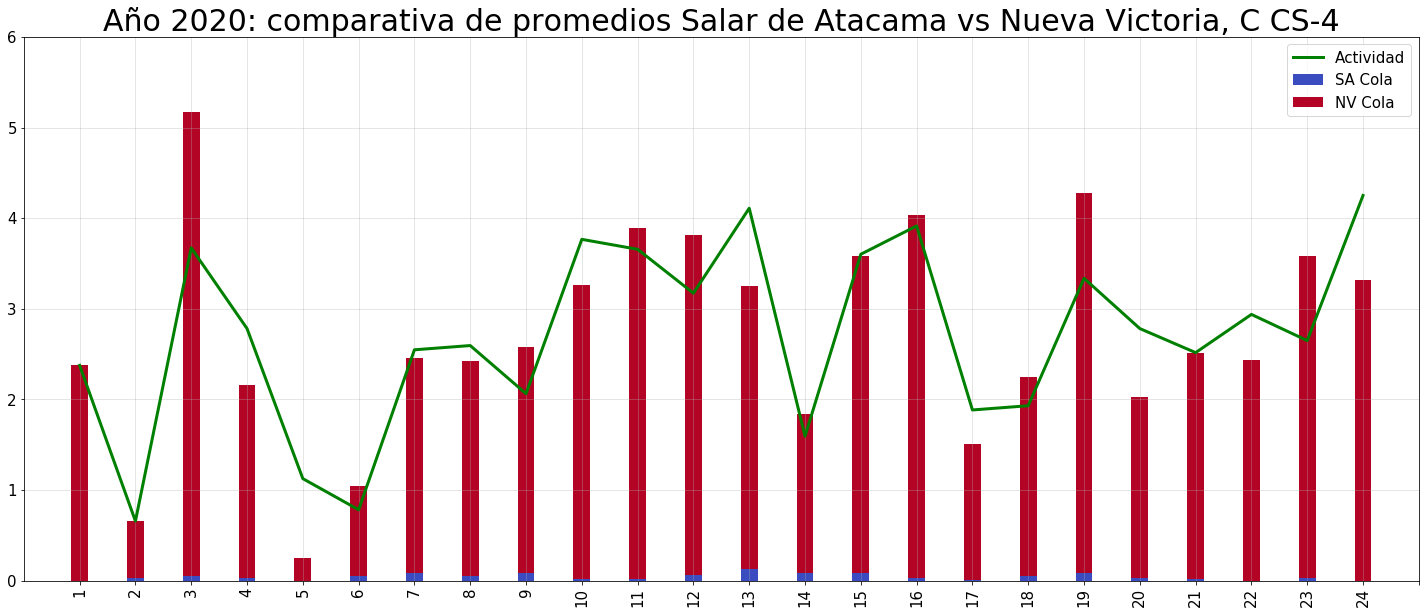

In [33]:
zona = 'C CS-4'
titulo = "Año 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/mean_2020_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

### NPT4

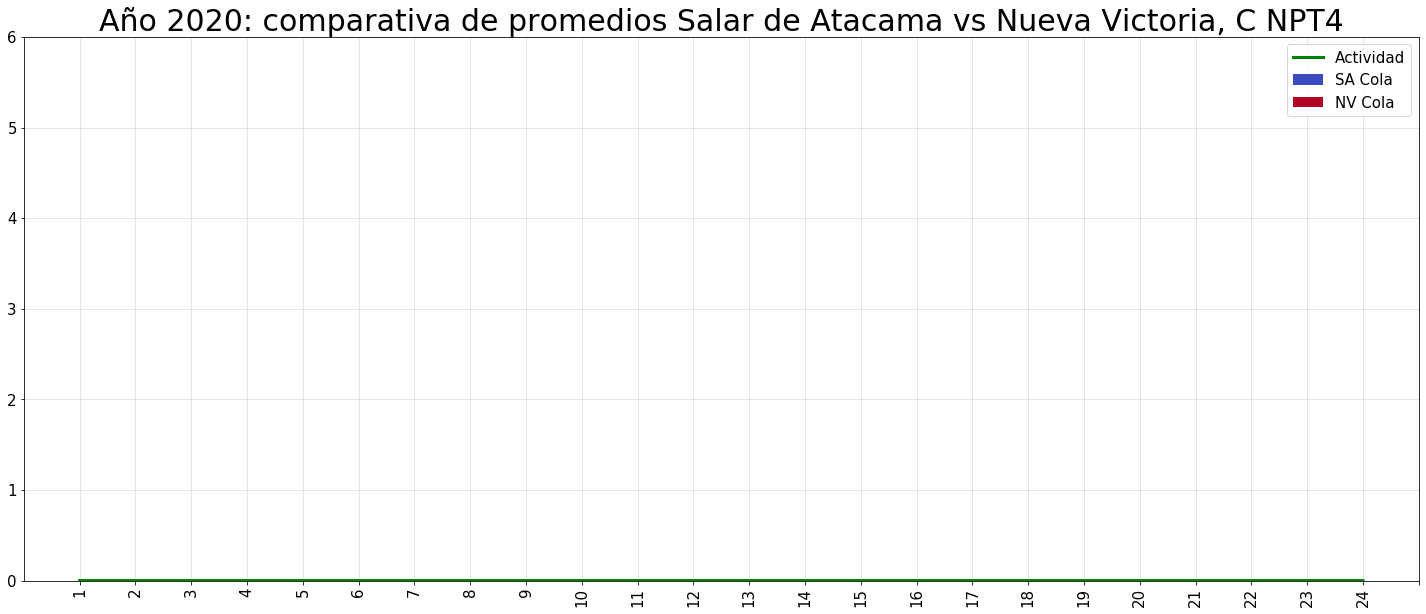

In [34]:
zona = 'C NPT4'
titulo = "Año 2020: comparativa de promedios Salar de Atacama vs Nueva Victoria, "+zona
file = './presentable_3/mean_2020_SA_NV_'+zona+'.png'
stacked_grouped_bar_plot(sum_act_prom,col_prom_SA_NV,zona,titulo,file,7)

# 4. Gráfico minutos/camion, camiones cola, minutos totales,parcelados.

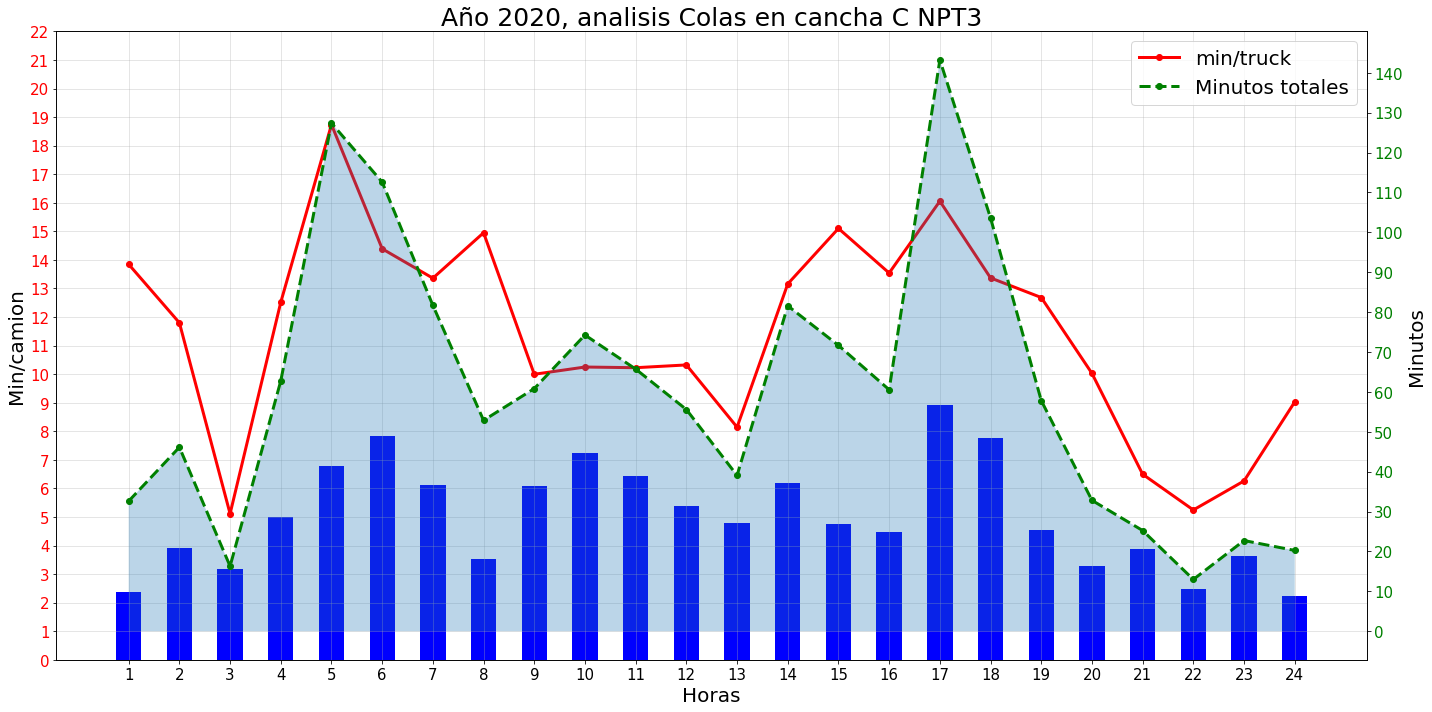

In [36]:
zona = 'C NPT3'
ano_2020 = stack_by_day_2(colas,zona,1,160,metric='mean')
b_1 = ano_2020
b_1['minutos'] = b_1['minutos/camion']*b_1['camiones']
title = "Año 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_2020_"+zona+".png"
plot_minutos_totales(b_1,title,file)

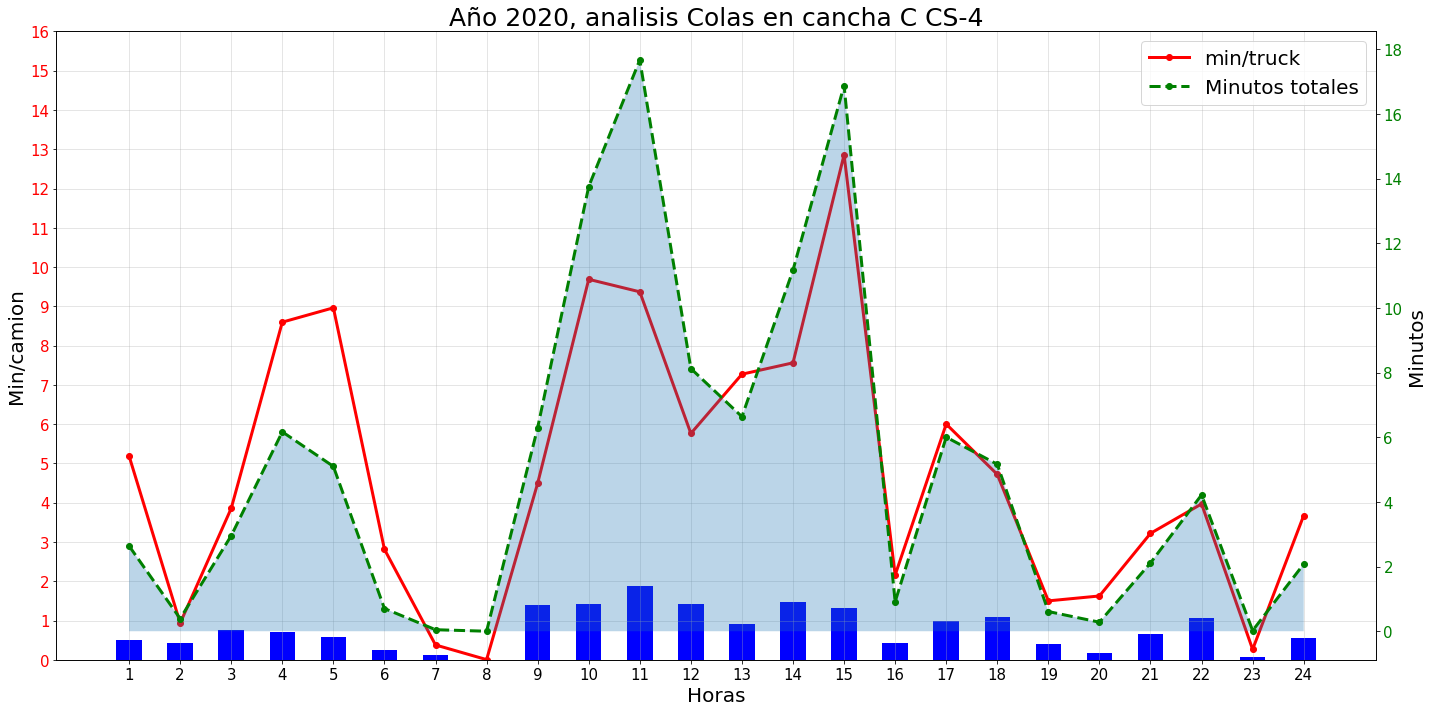

In [37]:
zona = 'C CS-4'
ano_2020 = stack_by_day_2(colas,zona,1,160,metric='mean')
b_2 = ano_2020
b_2['minutos'] = b_2['minutos/camion']*b_2['camiones']
title = "Año 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_2020_"+zona+".png"
plot_minutos_totales(b_2,title,file,2)

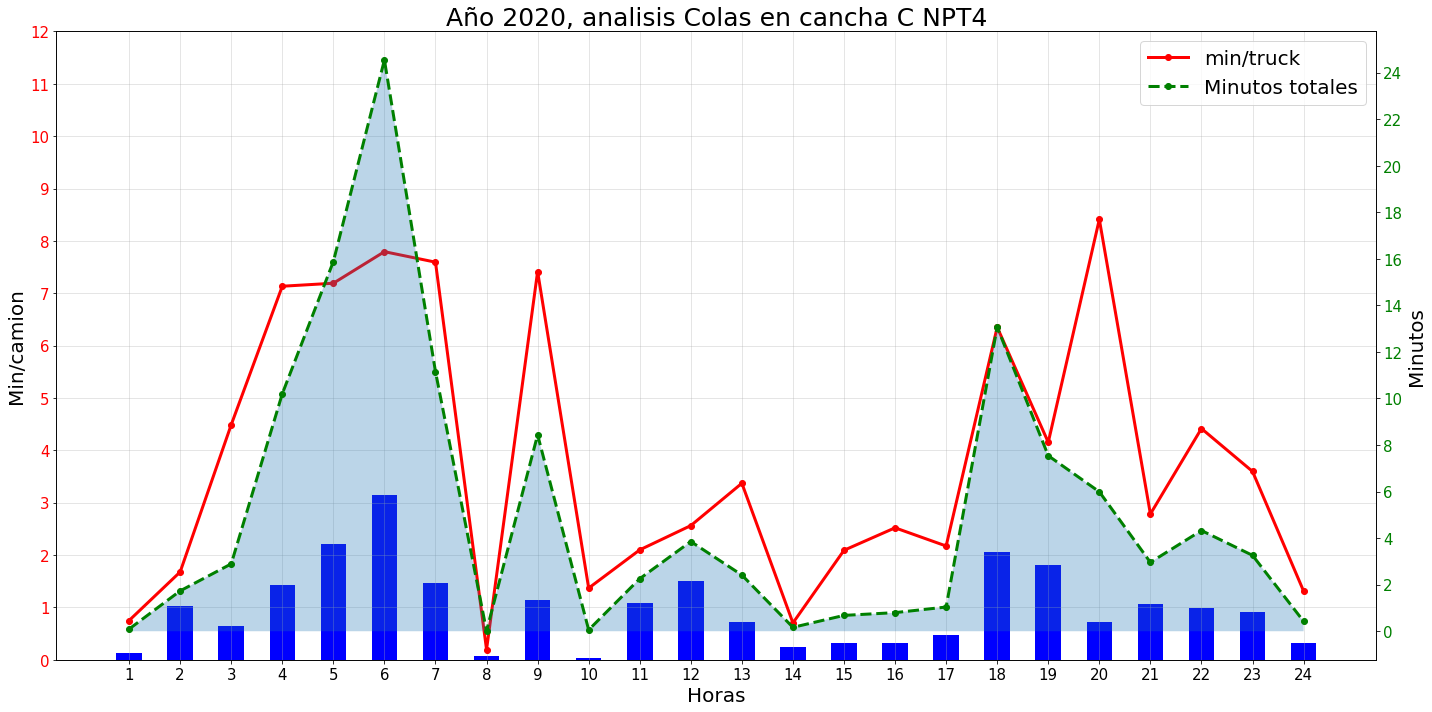

In [38]:
zona = 'C NPT4'
ano_2020 = stack_by_day_2(colas,zona,1,160,metric='mean')
b_3 = ano_2020
b_3['minutos'] = b_3['minutos/camion']*b_3['camiones']
title = "Año 2020, analisis Colas en cancha "+zona
file = "./presentable_3/colas_minutos_2020_"+zona+".png"
plot_minutos_totales(b_3,title,file,2)

# DIFERENCIA DE TIEMPOS ESTIMADOS

__La idea es obtener cuanto tiempo en exceso estamos teniendo por camion si considearmos que deberían ser 15 min en promedio.__

In [39]:
def plot_diferencia_time(df,title,file=None,gap=3):
    plt.figure(figsize=(25,10))
    plt.plot(df['block'],df['diferencia'],label='diferencia',c='b',lw=3,marker='o')
    plt.legend()
    plt.title(title,fontsize=25)
    plt.xlabel("Horas",fontsize=15)
    plt.ylabel("diferencia [min]",fontsize=15)
    plt.xticks(np.arange(1,25,1),fontsize=15)
    plt.yticks(np.arange(int(df['diferencia'].min()),int(df['diferencia'].max()+1),gap),fontsize=15)
    plt.grid(True)
    if file!=None:
        plt.savefig(file)
    plt.show()

# ENERO 2020
### NPT3

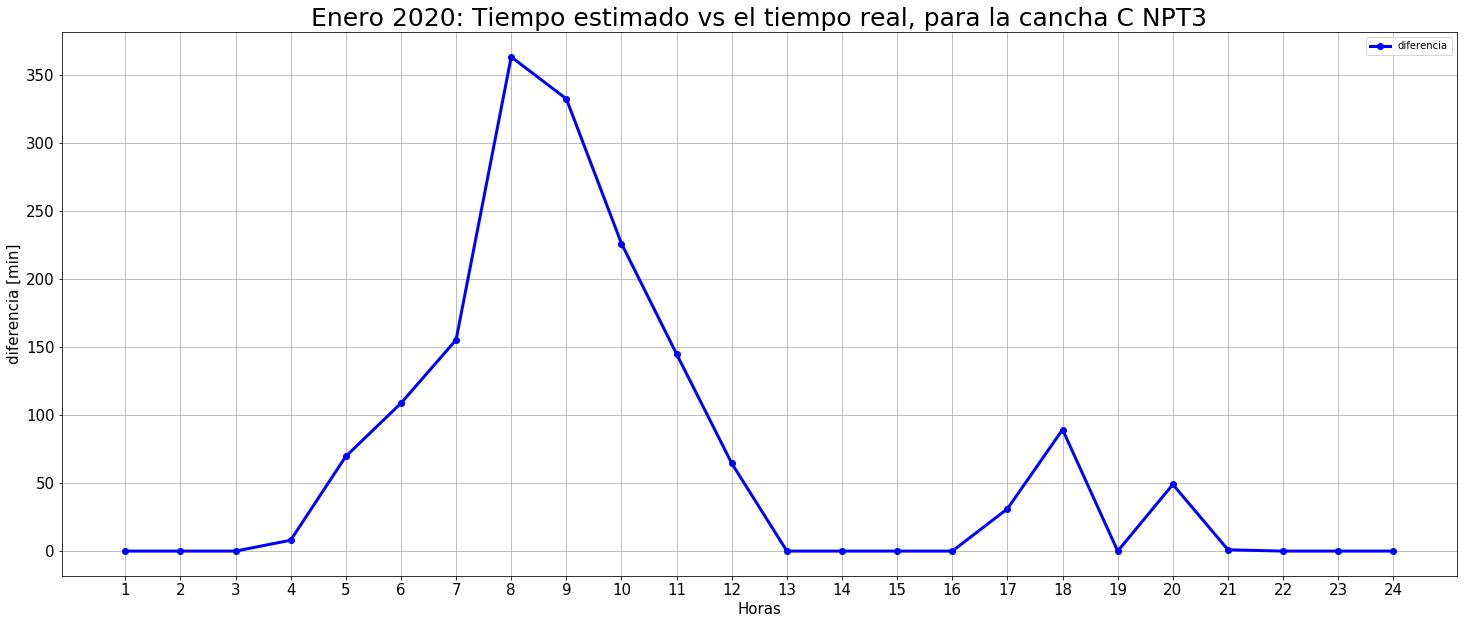

In [40]:
dif_time = pd.concat([a_1[['block','minutos']],prom_cola_end_enero['C NPT3']],axis=1)
dif_time["diferencia"] = dif_time['minutos']- dif_time['C NPT3']*15
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

zona = 'C NPT3'
title = "Enero 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_enero_"+zona+".png"
plot_diferencia_time(dif_time,title,file,50)

In [41]:
print(dif_time['diferencia'].sum(),dif_time)

1641.6949523210178     block     minutos    C NPT3  diferencia
1     1.0    1.435441  0.548350    0.000000
2     2.0    4.992114  0.520028    0.000000
3     3.0    1.402390  0.481420    0.000000
4     4.0   41.907325  2.261604    7.983271
5     5.0   78.506377  0.596672   69.556293
6     6.0  167.086455  3.900437  108.579898
7     7.0  220.460347  4.354935  155.136316
8     8.0  422.560093  3.971905  362.981515
9     9.0  417.397492  5.680561  332.189077
10   10.0  295.578756  4.647121  225.871946
11   11.0  190.015411  3.018862  144.732480
12   12.0  119.921943  3.700745   64.410765
13   13.0   11.811854  1.350814    0.000000
14   14.0    9.337928  1.202075    0.000000
15   15.0   32.254714  2.225099    0.000000
16   16.0   15.001986  1.494230    0.000000
17   17.0   42.069980  0.732538   31.081913
18   18.0  129.840304  2.704925   89.266432
19   19.0   26.931074  1.990883    0.000000
20   20.0   90.756371  2.786181   48.963657
21   21.0   26.894917  1.730235    0.941388
22   22.0    

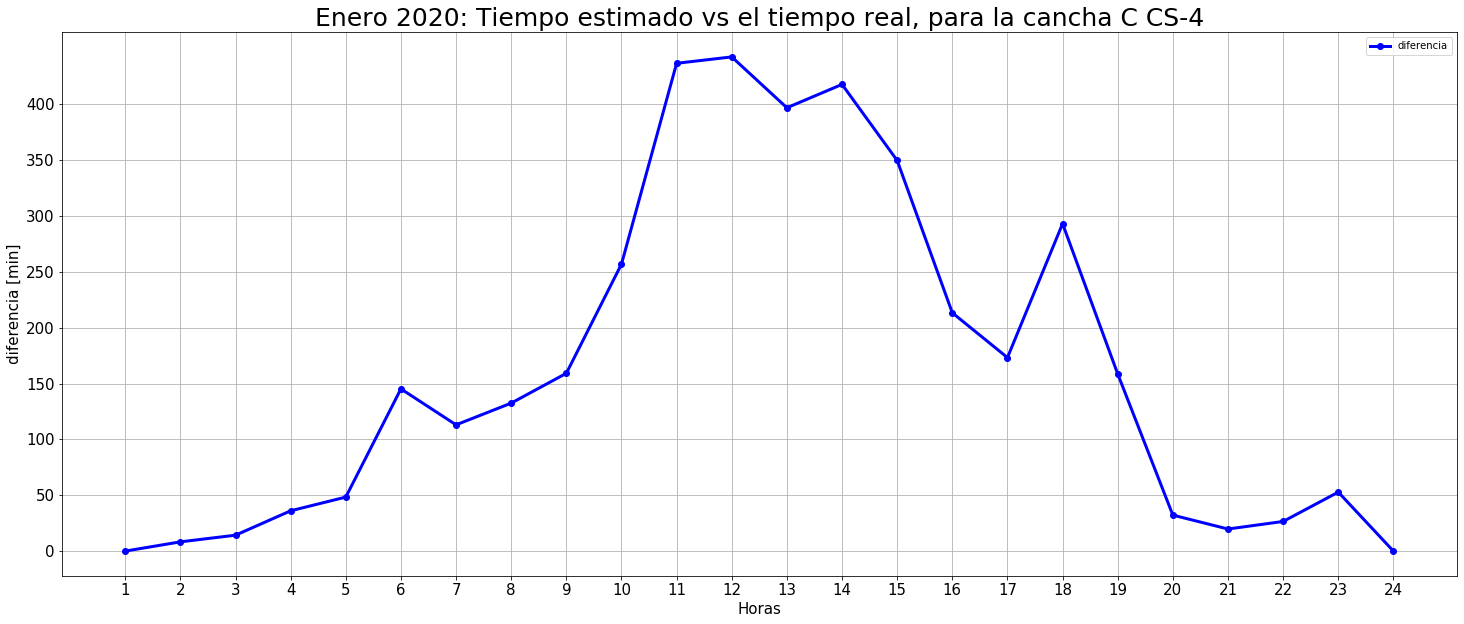

In [42]:
zona = 'C CS-4'
dif_time = pd.concat([a_2[['block','minutos']],prom_cola_end_enero[zona]],axis=1)
dif_time["diferencia"] = dif_time['minutos']- (dif_time[zona]*15)
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   


title = "Enero 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_enero_"+zona+".png"
plot_diferencia_time(dif_time,title,file,50)

In [43]:
print(dif_time['diferencia'].sum(),dif_time)

3928.477793532705     block     minutos    C CS-4  diferencia
1     1.0   20.194167  3.427736    0.000000
2     2.0   29.836027  1.437502    8.273503
3     3.0  107.259680  6.201174   14.242077
4     4.0   94.852591  3.917970   36.083048
5     5.0   67.111791  1.250000   48.361791
6     6.0  185.833485  2.703126  145.286601
7     7.0  170.599242  3.834962  113.074815
8     8.0  195.362816  4.188973  132.528217
9     9.0  228.190572  4.597657  159.225710
10   10.0  338.272713  5.417969  257.003177
11   11.0  506.507464  4.640625  436.898087
12   12.0  516.855740  4.949708  442.610125
13   13.0  474.225171  5.145020  397.049864
14   14.0  470.080972  3.472658  417.991107
15   15.0  433.927614  5.604981  349.852894
16   16.0  300.163170  5.782715  213.422437
17   17.0  214.683106  2.757813  173.315919
18   18.0  368.140051  4.992188  293.257234
19   19.0  267.943288  7.285645  158.658609
20   20.0  100.269921  4.537598   32.205945
21   21.0   90.731644  4.730470   19.774599
22   22.0  101

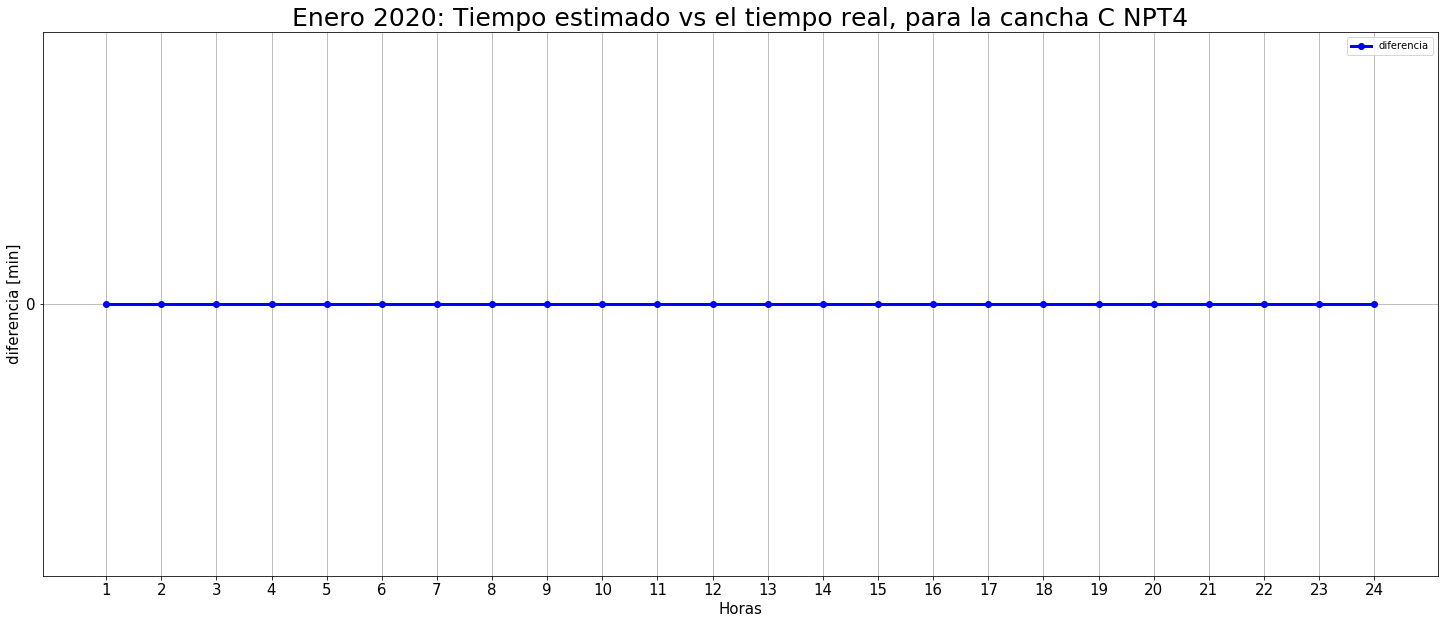

In [44]:
zona = 'C NPT4'
dif_time = pd.concat([a_3[['block','minutos']],prom_cola_end_enero[zona]],axis=1)
dif_time["diferencia"] = dif_time['minutos']- (dif_time[zona]*15)
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   


title = "Enero 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_enero_"+zona+".png"
plot_diferencia_time(dif_time,title,file,15)

# 2020 
### NPT3

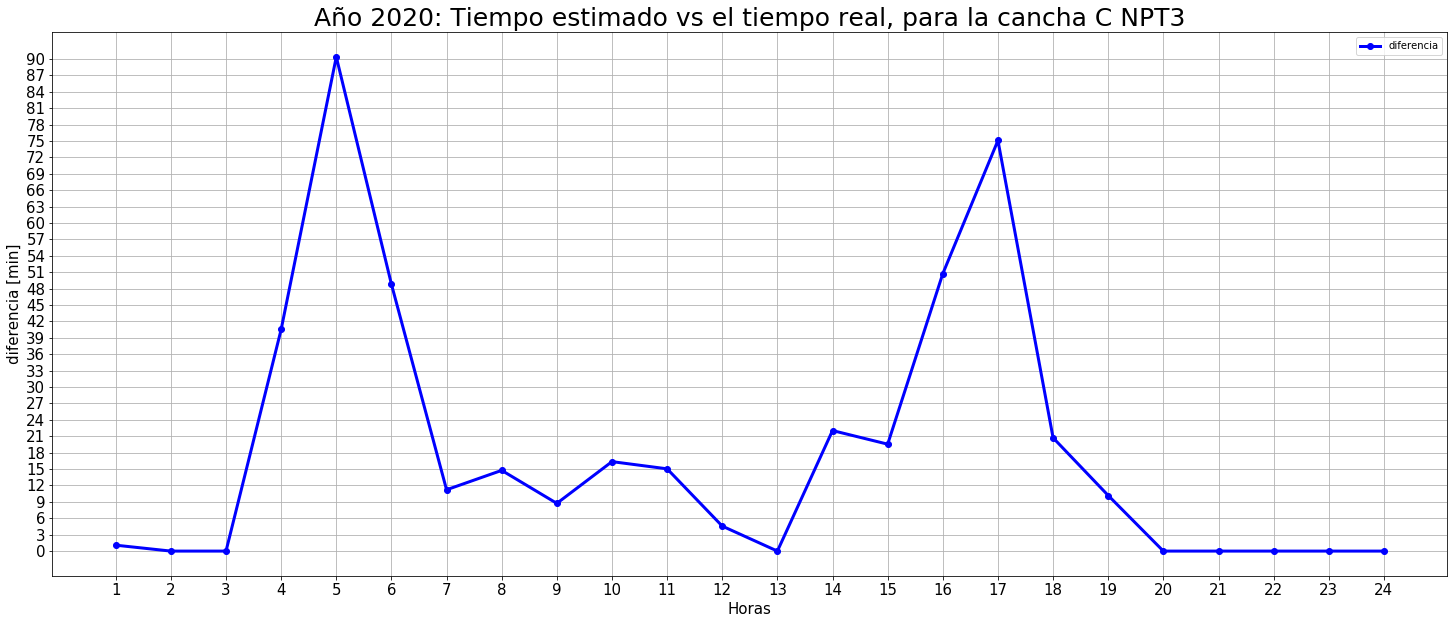

In [45]:
dif_time = pd.concat([b_1[['block','minutos']],prom_cola_2020['C NPT3']],axis=1)
dif_time["diferencia"] = dif_time['minutos']- dif_time['C NPT3']*15
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

zona = 'C NPT3'
title = "Año 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_2020_"+zona+".png"
plot_diferencia_time(dif_time,title,file)

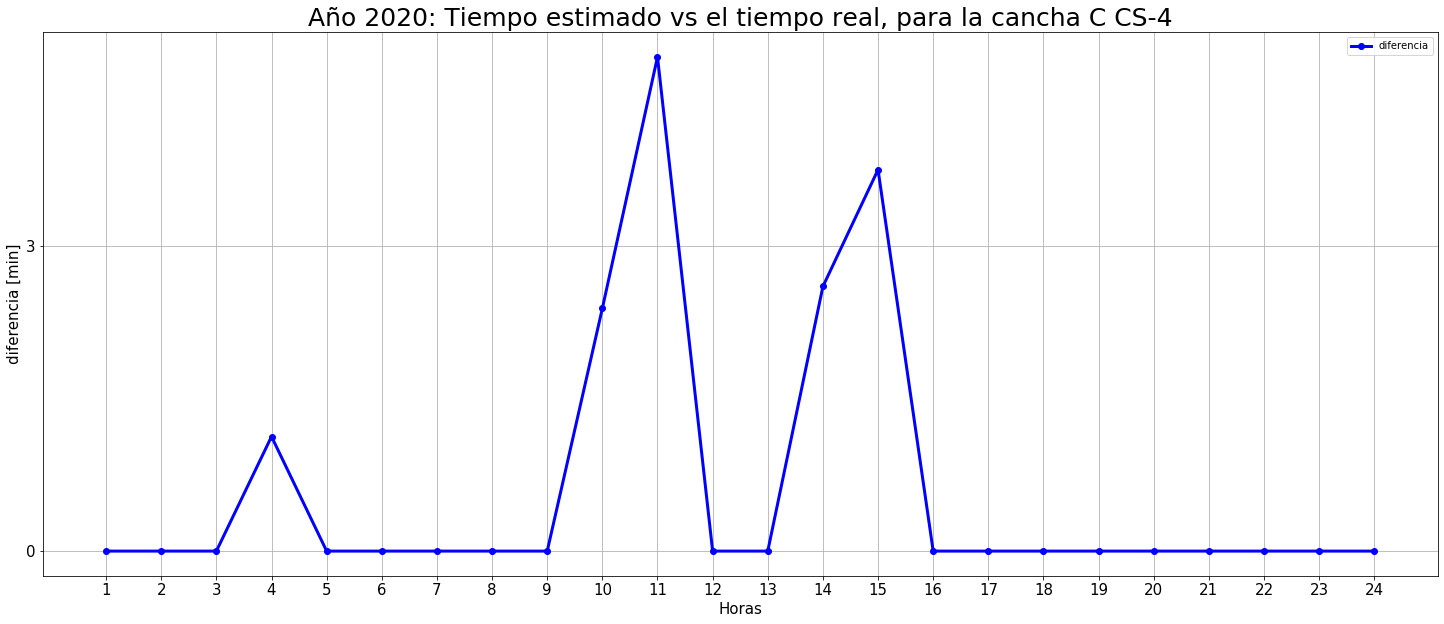

In [46]:
zona = 'C CS-4'
dif_time = pd.concat([b_2[['block','minutos']],prom_cola_2020[zona]],axis=1)
dif_time["diferencia"] = dif_time['minutos']- dif_time[zona]*15
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

title = "Año 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_2020_"+zona+".png"
plot_diferencia_time(dif_time,title,file)

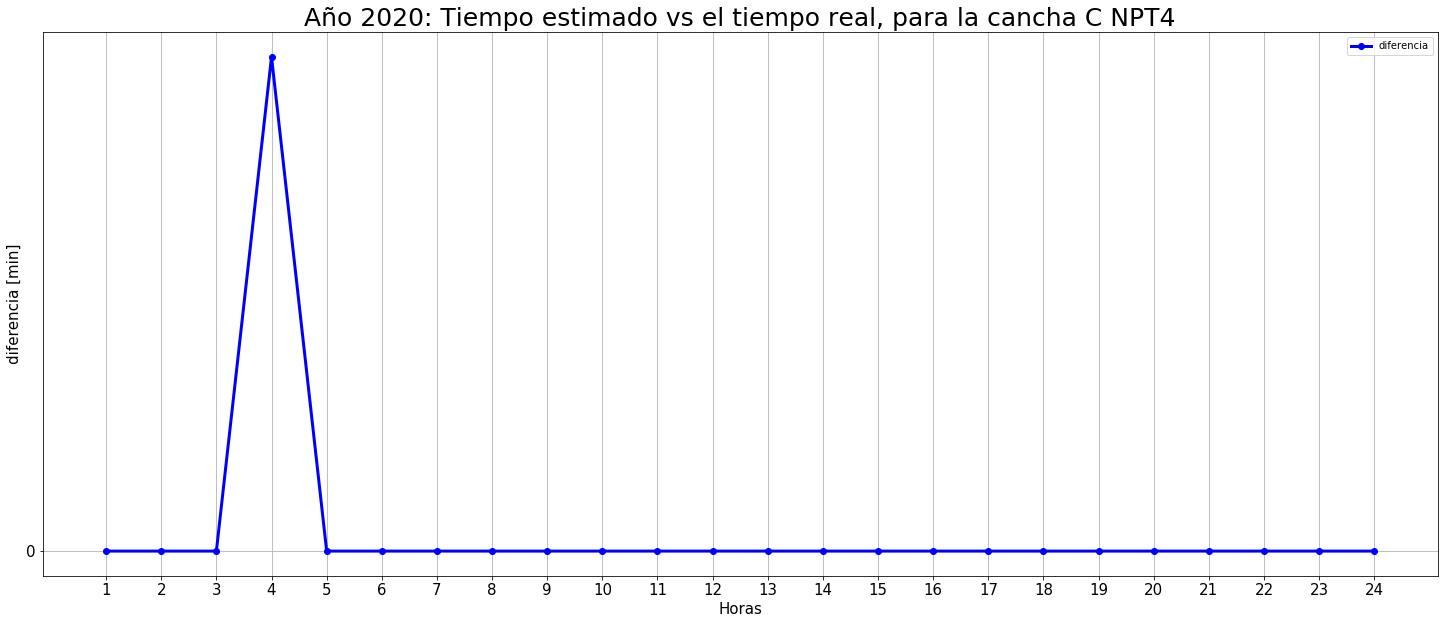

In [47]:
zona = 'C NPT4'
dif_time = pd.concat([b_3[['block','minutos']],prom_cola_2020[zona]],axis=1)
dif_time["diferencia"] = dif_time['minutos']- dif_time[zona]*15
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

title = "Año 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_2020_"+zona+".png"
plot_diferencia_time(dif_time,title,file)

In [48]:
actividad[(actividad['ZO']=='C NPT3') & (actividad['Day of year [In]']== 5)].shape[0]

76

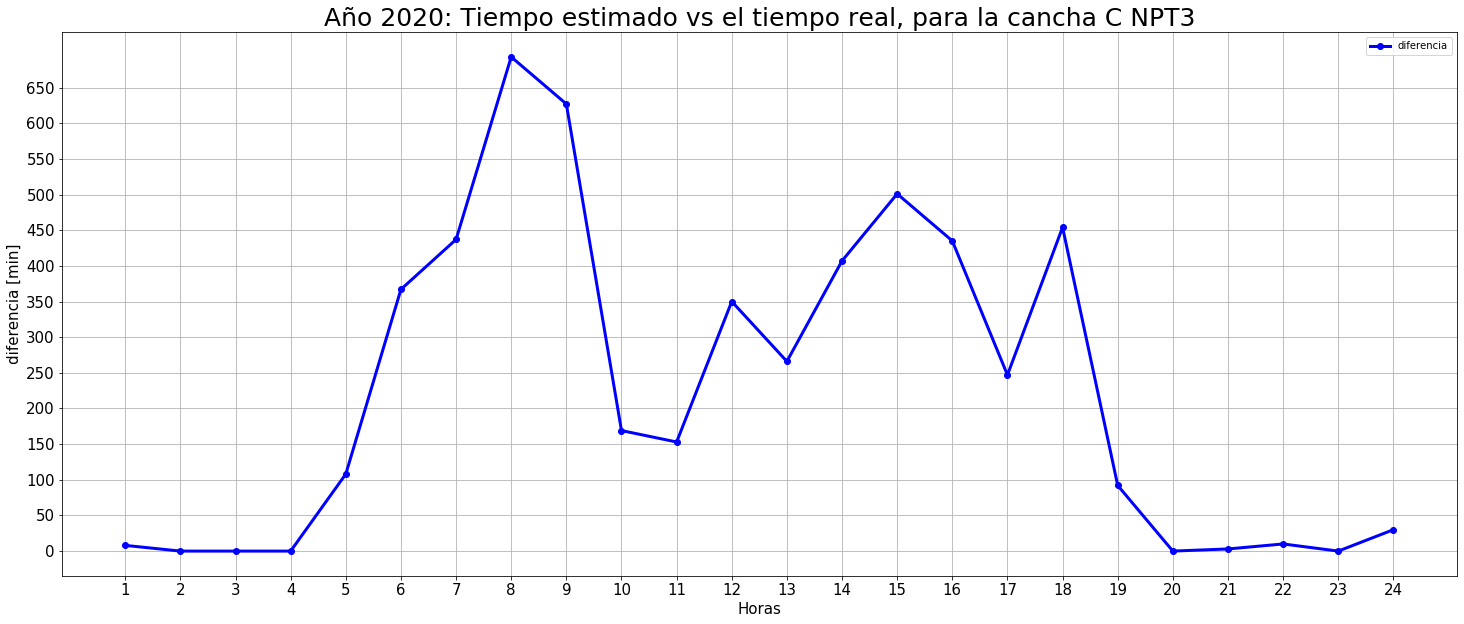

In [49]:
zona = 'C NPT3'

aux_1 = analisis_por_dia(colas_old,3,3,1,25,None,condicion='end',metric='peak')

aux_2 = stack_by_day_2(colas,zona,3,3,metric='mean')
aux_2['minutos'] = aux_2['minutos/camion']*aux_2['camiones']

dif_time = pd.concat([aux_2[['block','minutos']],aux_1['C NPT3']],axis=1)
dif_time["diferencia"] = dif_time['minutos']- dif_time['C NPT3']*15
dif_time.loc[dif_time['diferencia'] < 0, 'diferencia'] = 0   

title = "Año 2020: Tiempo estimado vs el tiempo real, para la cancha "+zona
file = "./presentable_3/dif_time_2020_"+zona+".png"
plot_diferencia_time(dif_time,title,file,50)

In [50]:
dif_time['diferencia'].sum()

5357